In [25]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

Загрузка датасета

In [26]:
df = pd.read_csv('data_train/train.csv')
test_df = pd.read_csv('data_train/test.csv')
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [27]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


# Предобработка датасета

In [28]:
(df['City'].nunique(),test_df['City'].nunique())

(34, 57)

Слишком много уникальных значений в категориальном признаке City поэтом просто удалим этот столбец, а также удалим Id.

In [29]:
df.drop(columns=['City','Id'], axis=1, inplace=True)
test_df.drop(columns=['City','Id'], axis=1, inplace=True)

Переведем даты в численные признак

In [30]:
import datetime
df['Open Date']  = pd.to_datetime(df['Open Date'])
test_df['Open Date']  = pd.to_datetime(test_df['Open Date'])
launch_date = datetime.datetime(2015, 3, 23)
# scale days open
df['Days Open'] = (launch_date - df['Open Date']).dt.days / 1000
test_df['Days Open'] = (launch_date - test_df['Open Date']).dt.days / 1000
df.drop('Open Date', axis=1, inplace=True)
test_df.drop('Open Date', axis=1, inplace=True)
df

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Days Open
0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,...,5,3,4,5,5,4,3,4,5653753.0,5.728
1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,0,6923131.0,2.594
2,Other,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,0,2055379.0,0.744
3,Other,IL,6,4.5,6.0,6.0,4,4,10,8,...,25,12,10,6,18,12,12,6,2675511.0,1.145
4,Other,IL,3,4.0,3.0,4.0,2,2,5,5,...,5,1,3,2,3,4,3,3,4316715.0,2.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Other,FC,2,3.0,3.0,5.0,4,2,4,4,...,0,0,0,0,0,0,0,0,5787594.0,2.462
133,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,...,0,0,0,0,0,0,0,0,9262754.0,3.084
134,Other,FC,3,4.0,4.0,4.0,2,3,5,5,...,0,0,0,0,0,0,0,0,2544857.0,3.180
135,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,...,0,0,0,0,0,0,0,0,7217634.0,1.606


Сравним схожесть данных по графикам из test.csv и train.csv

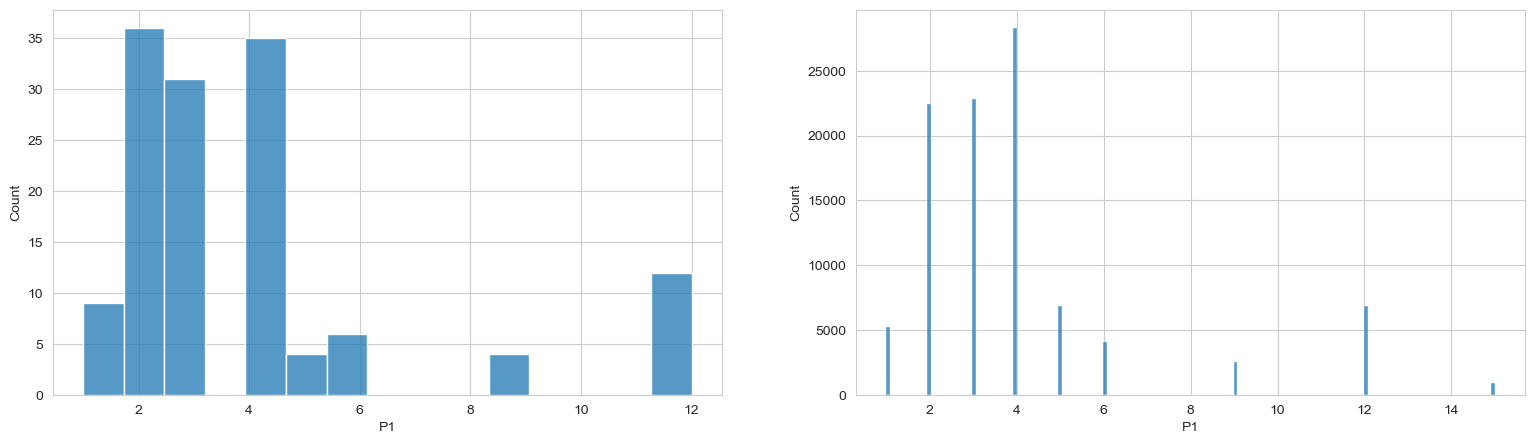

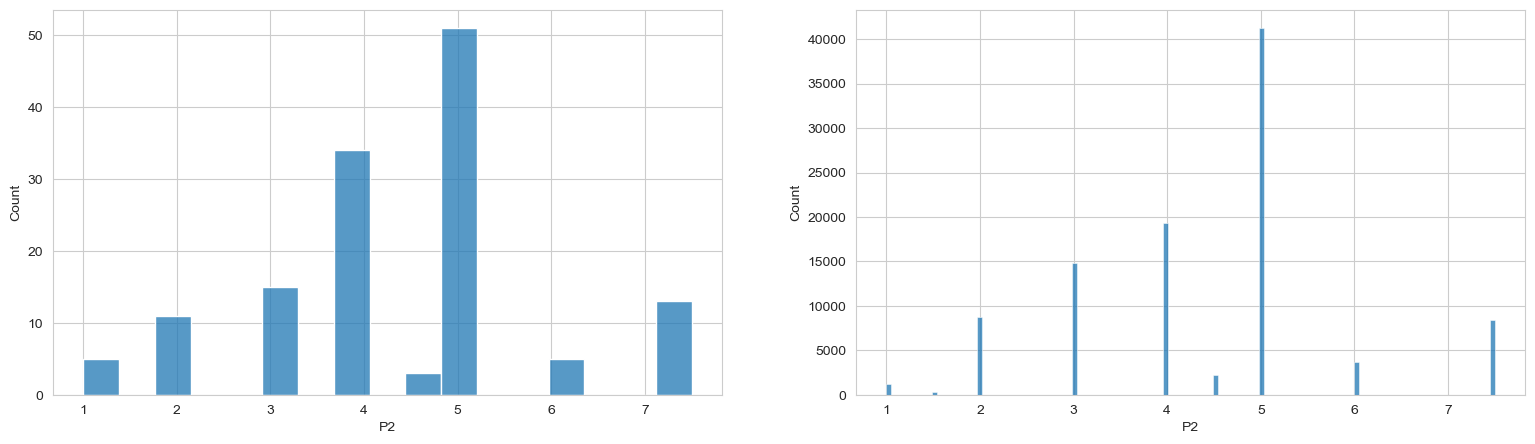

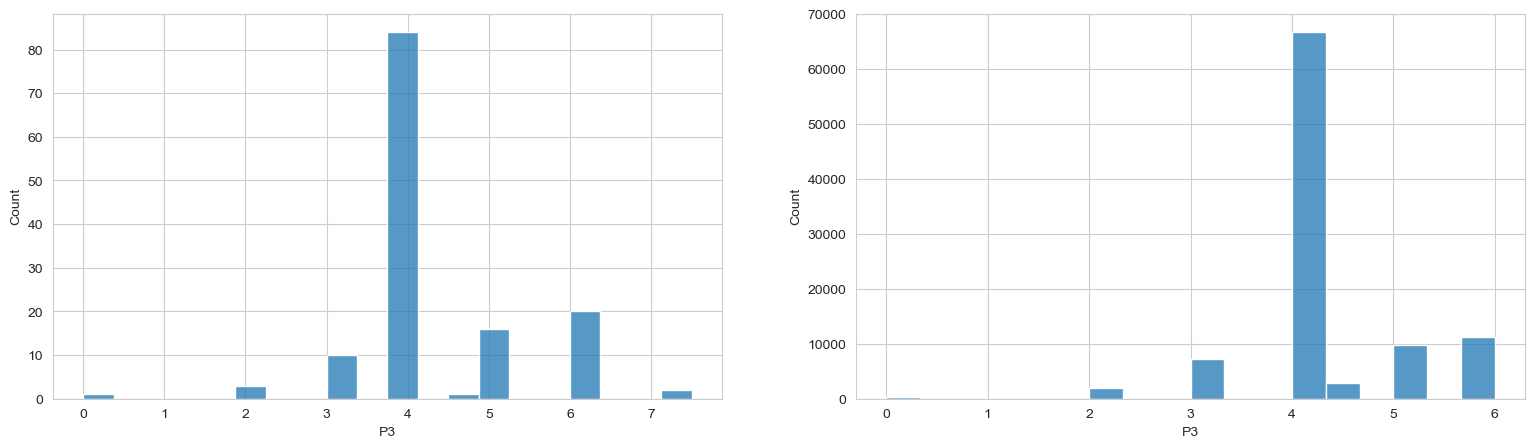

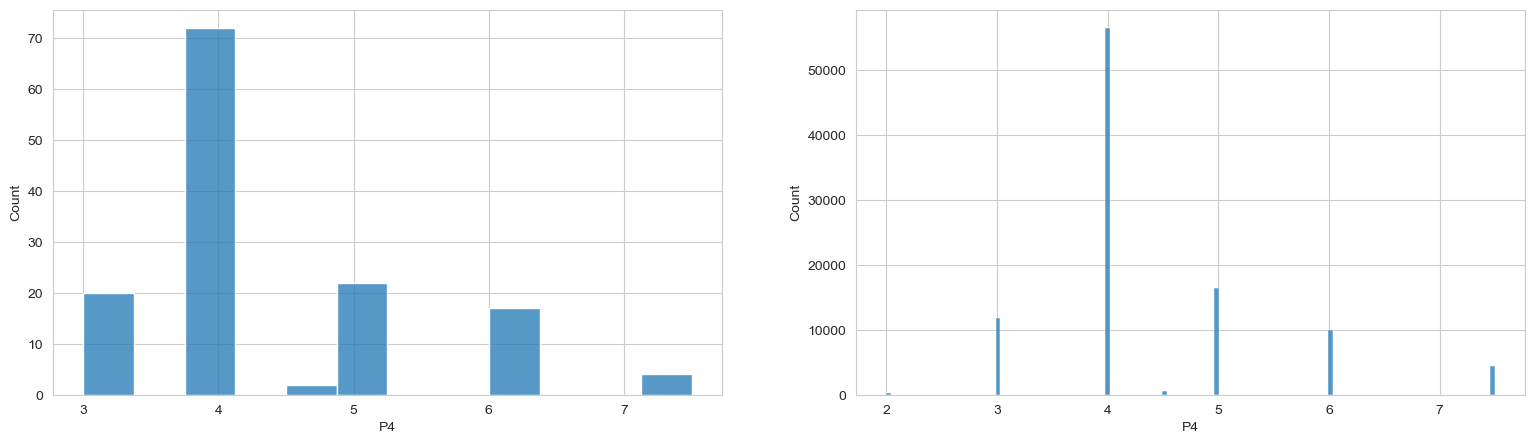

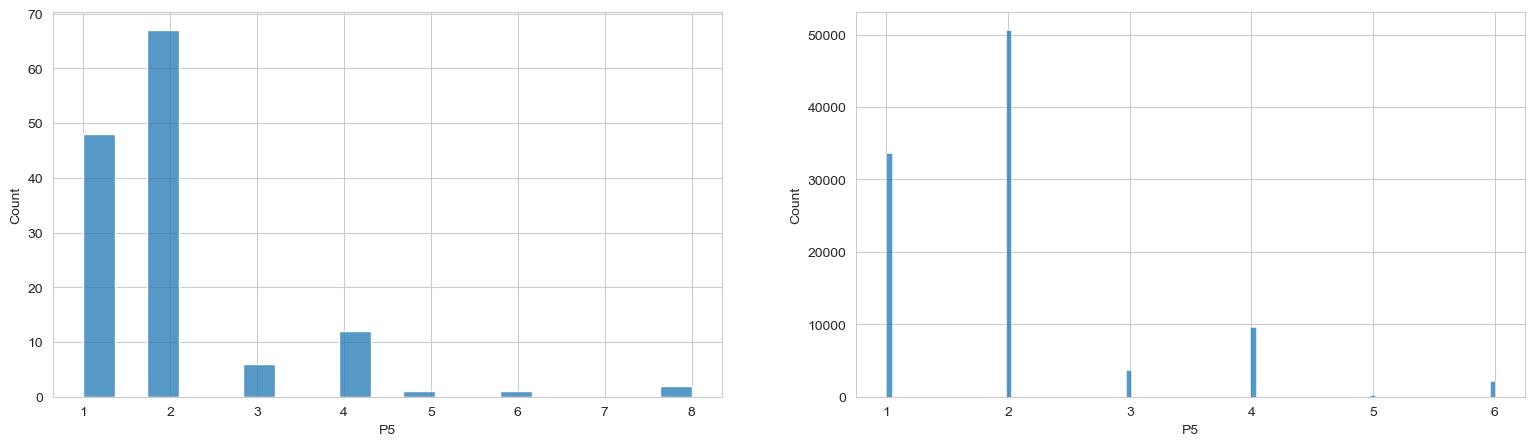

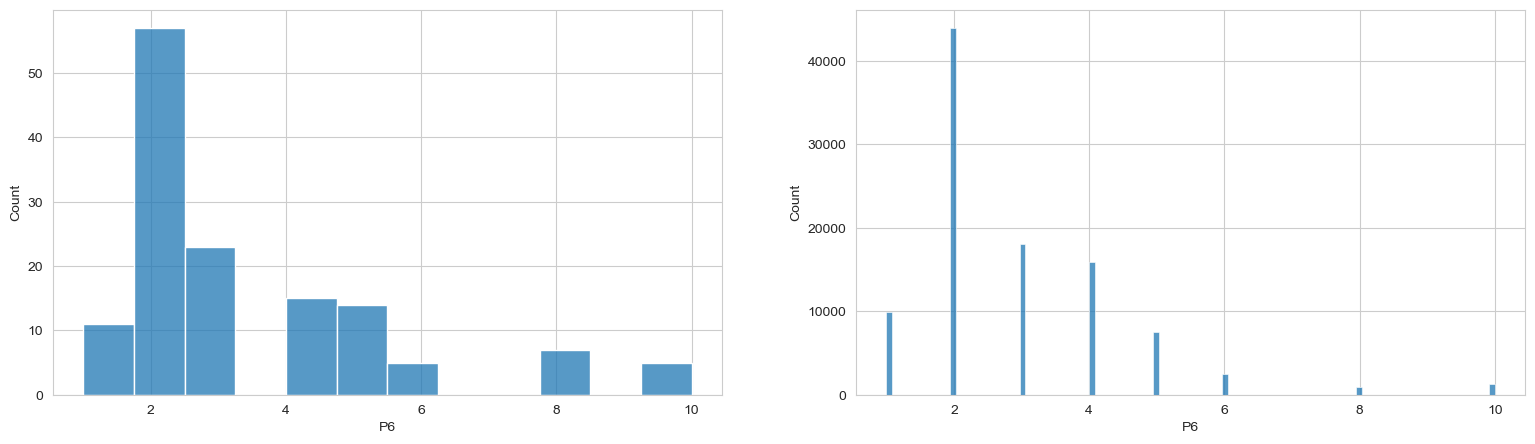

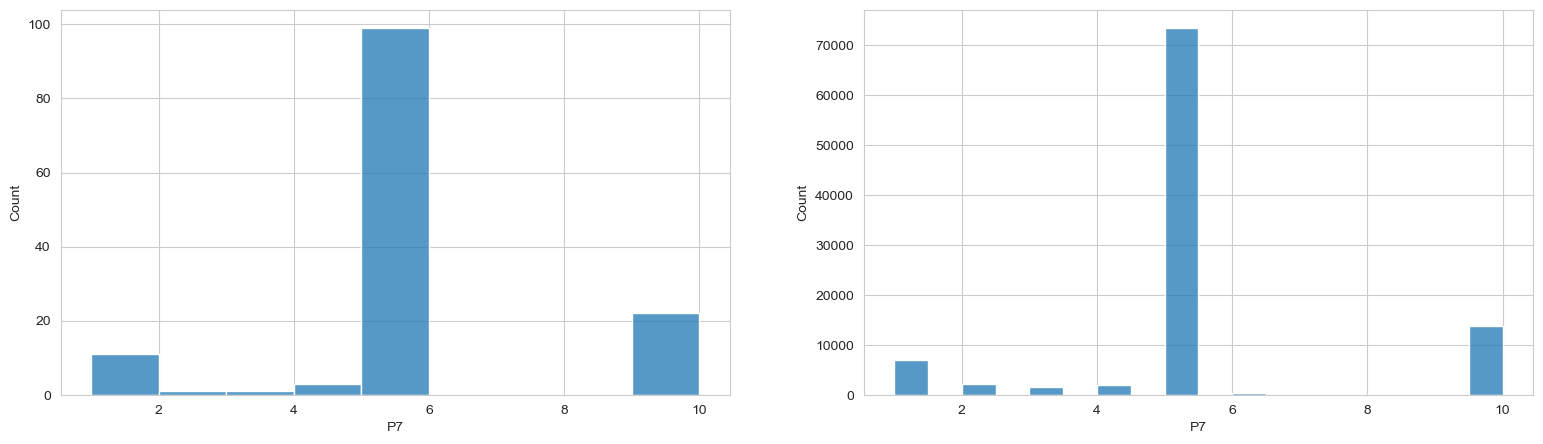

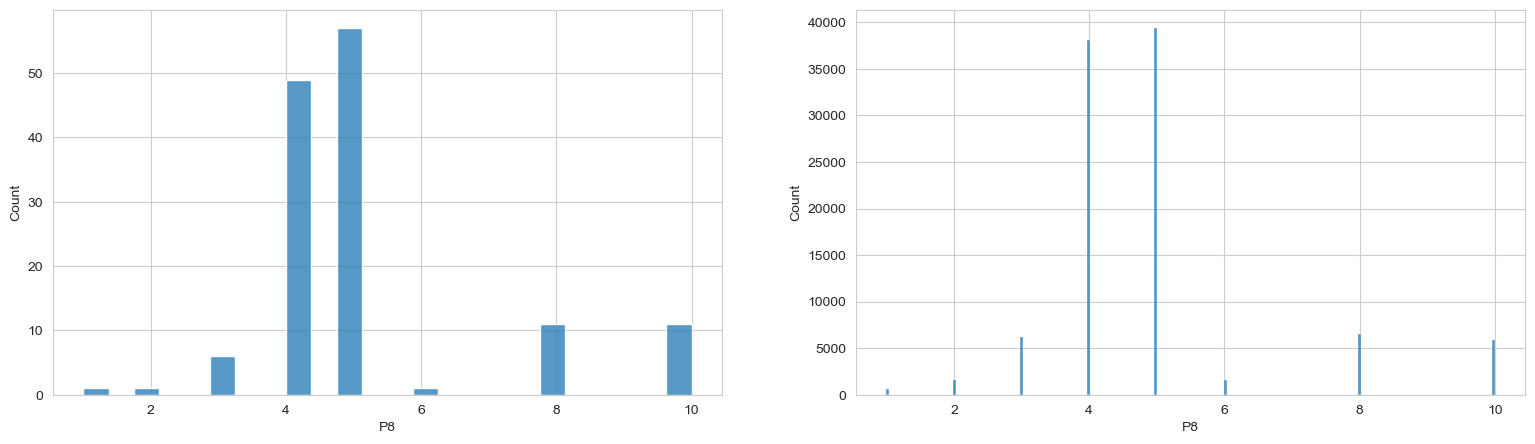

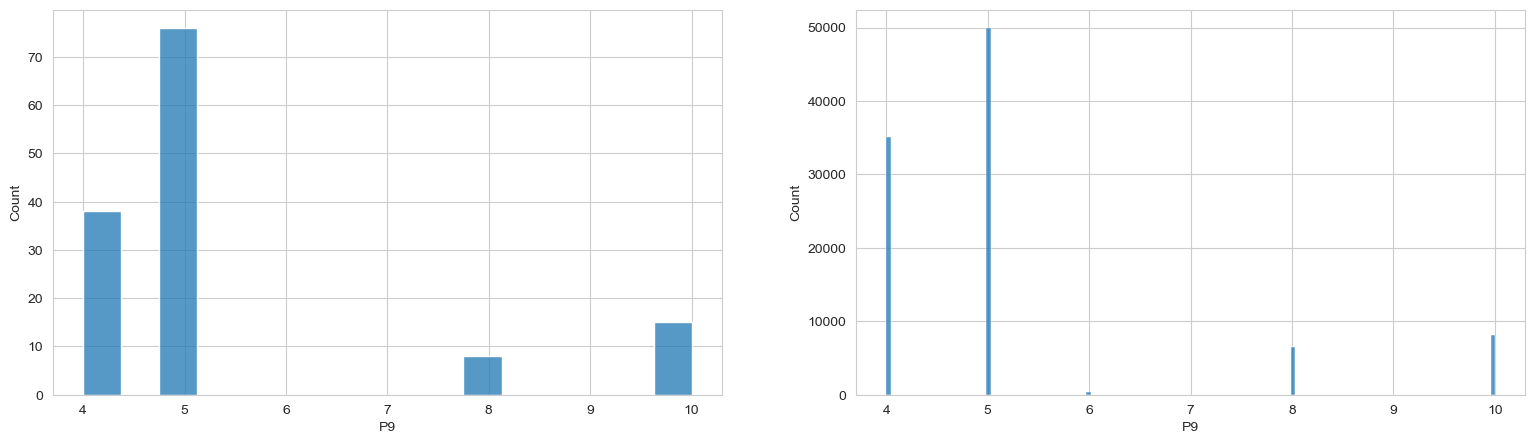

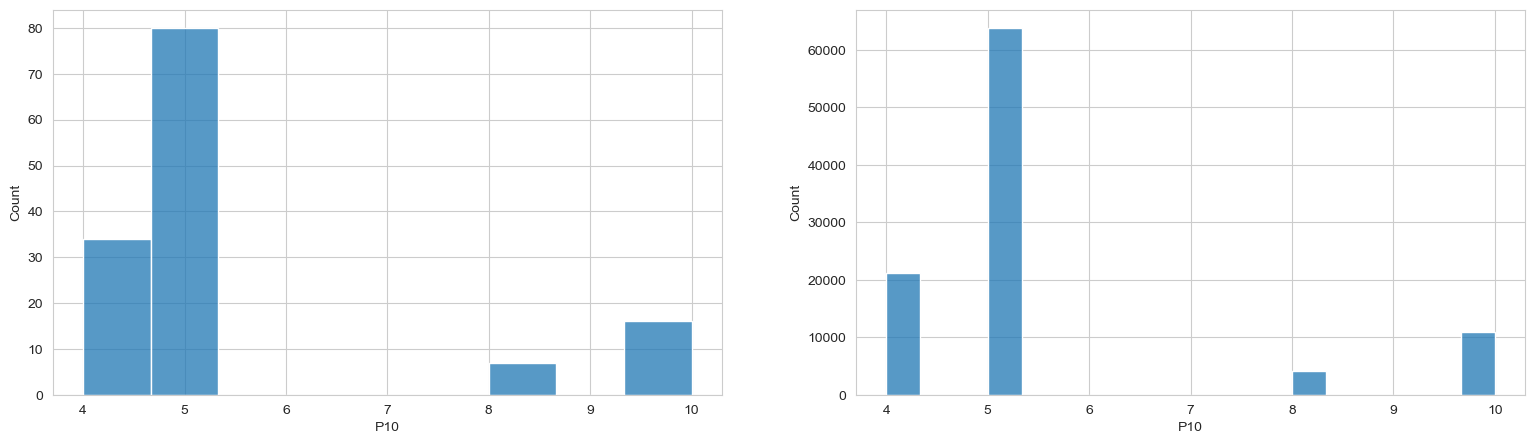

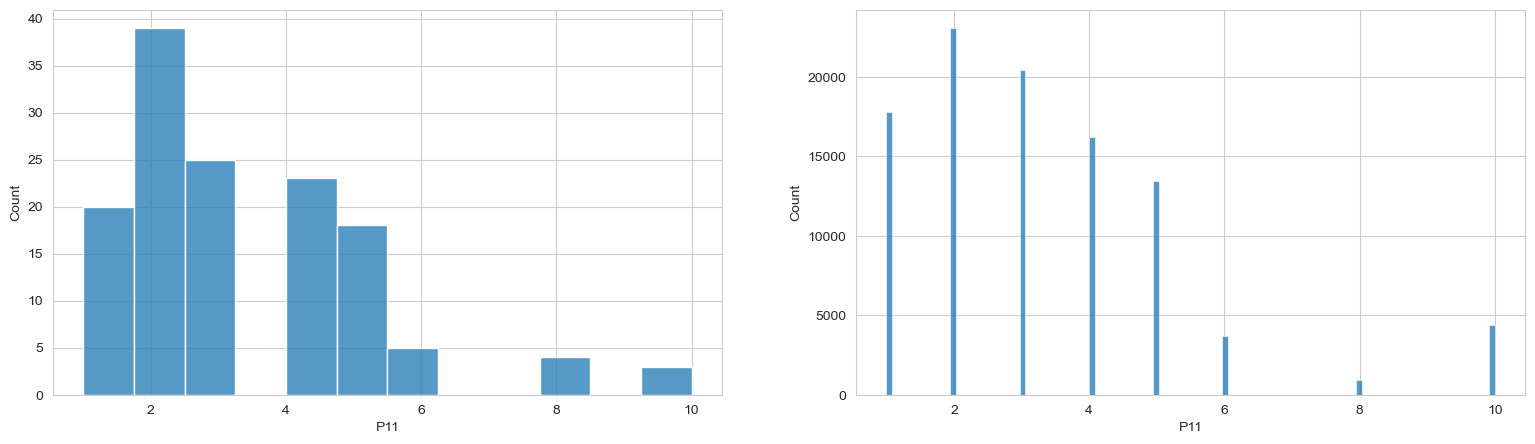

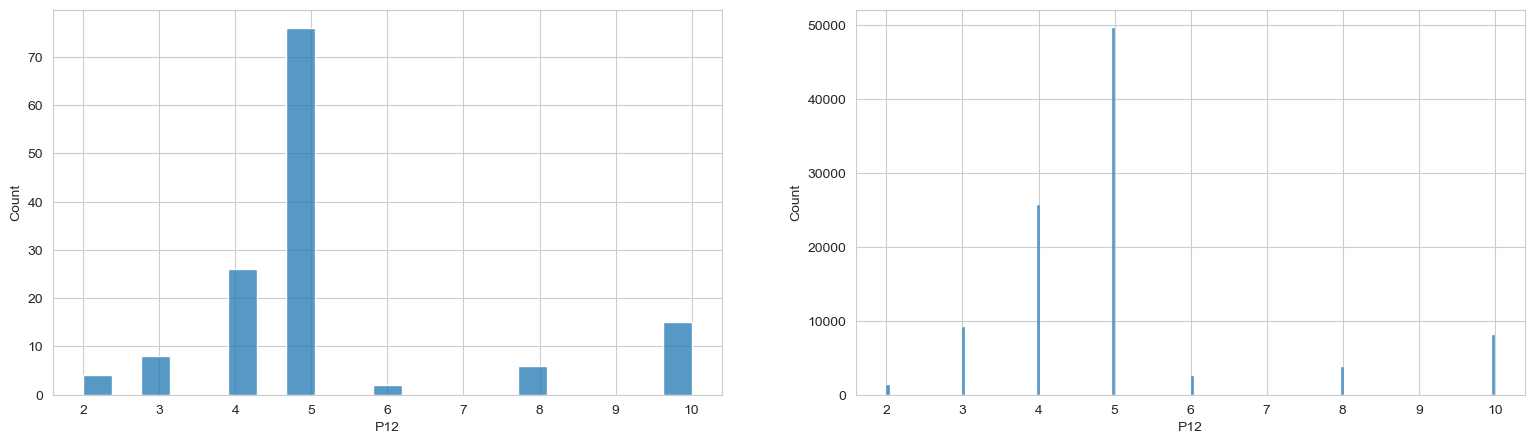

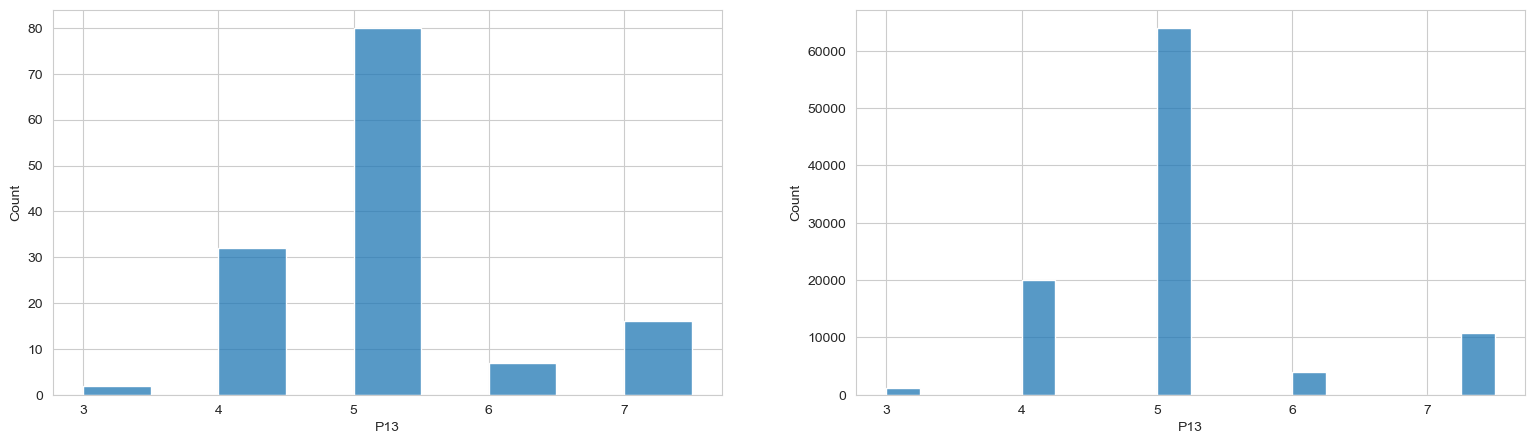

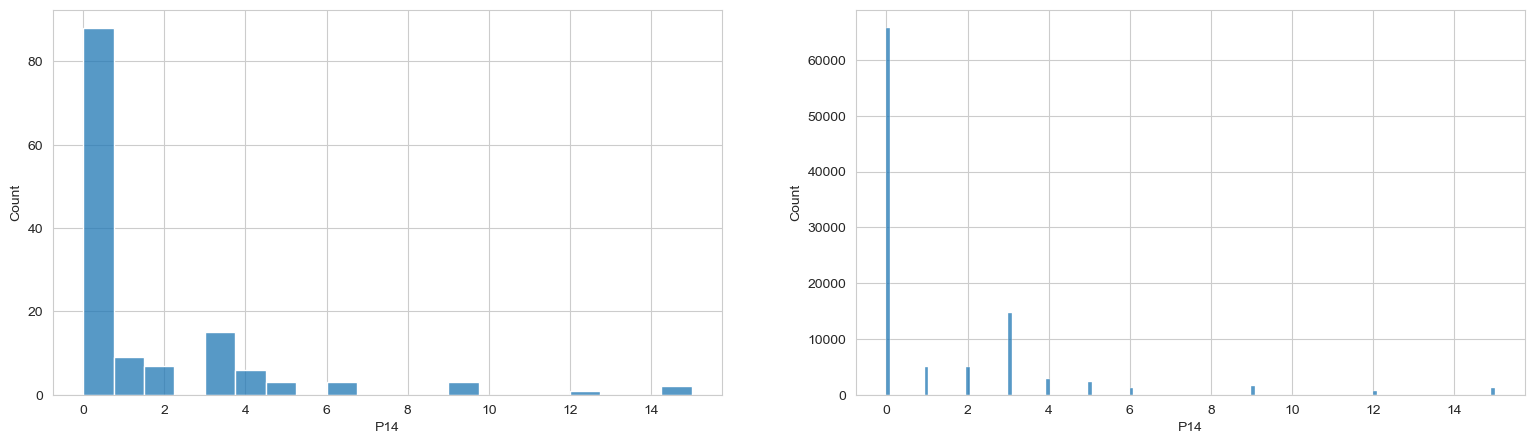

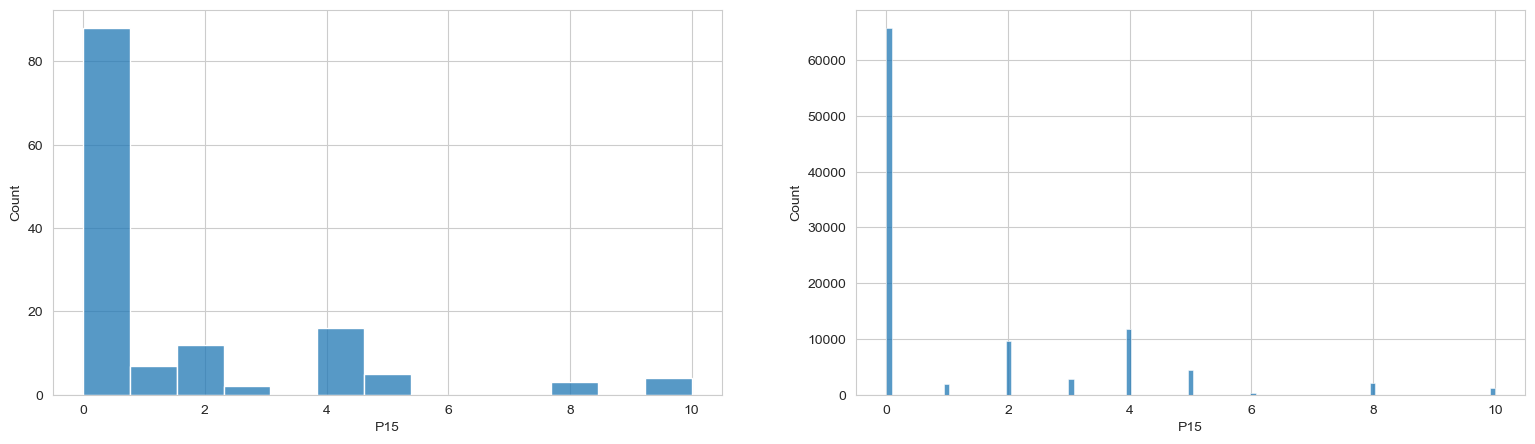

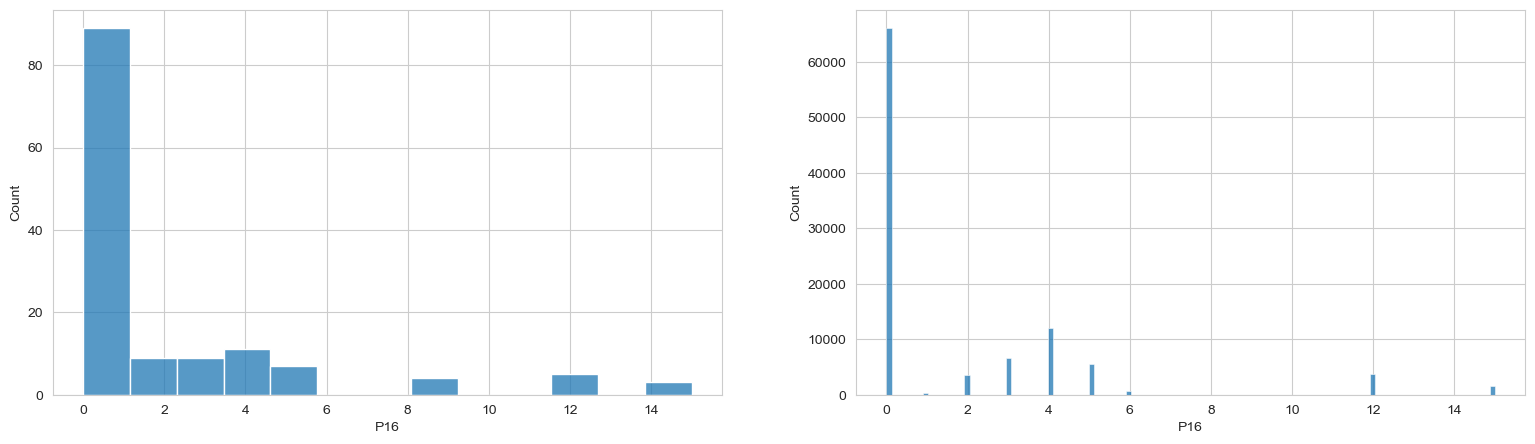

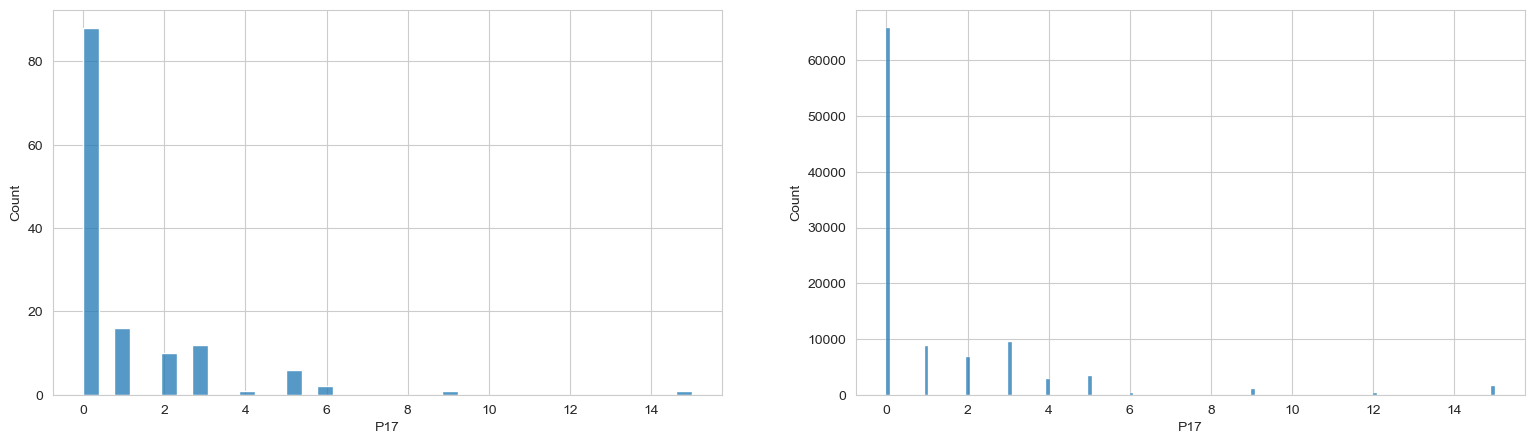

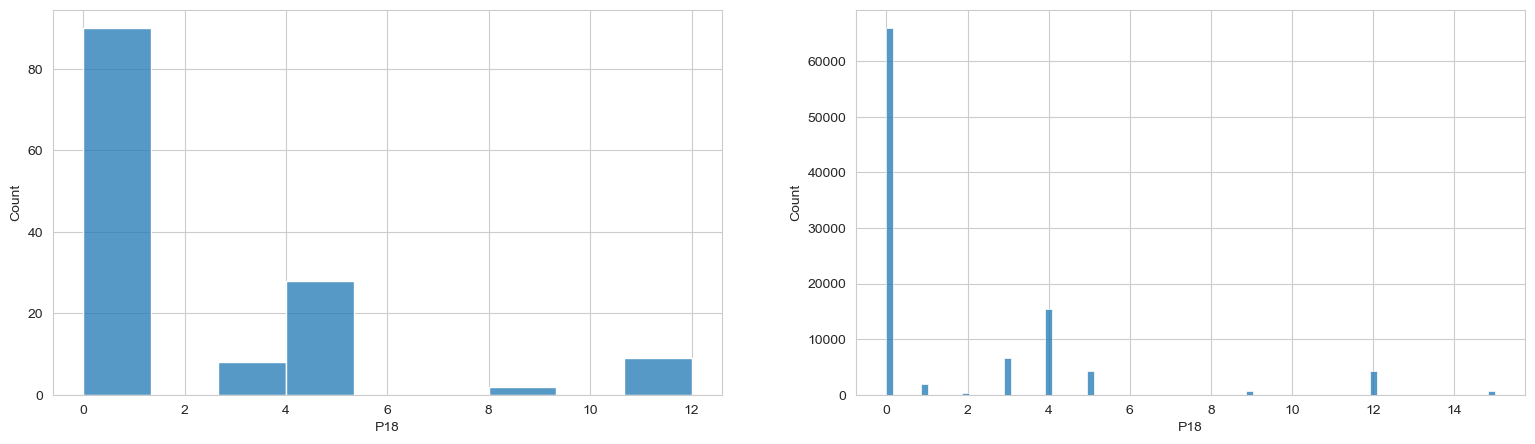

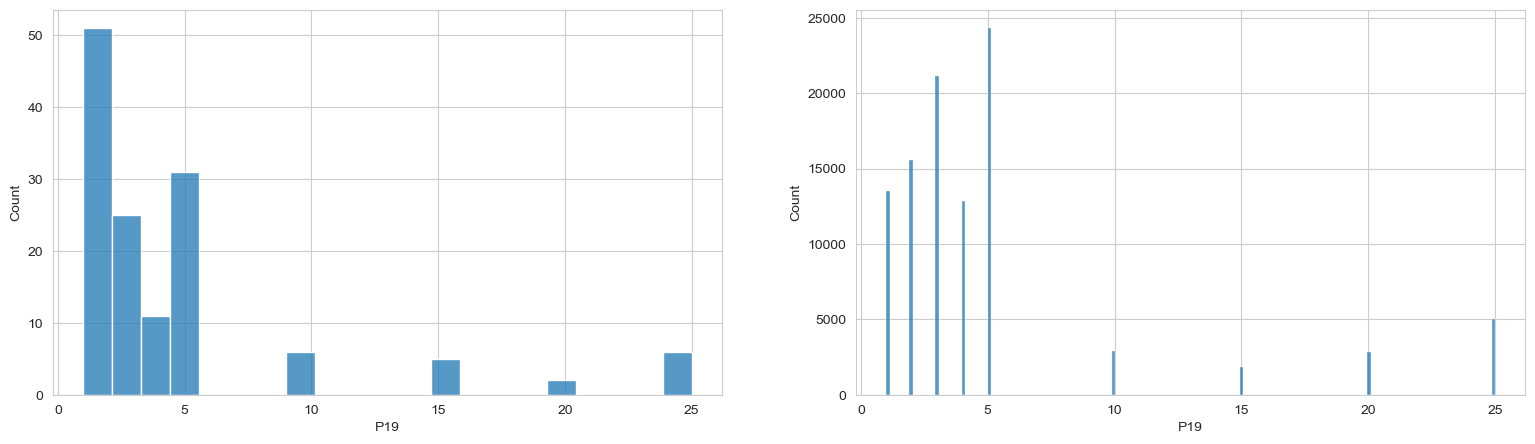

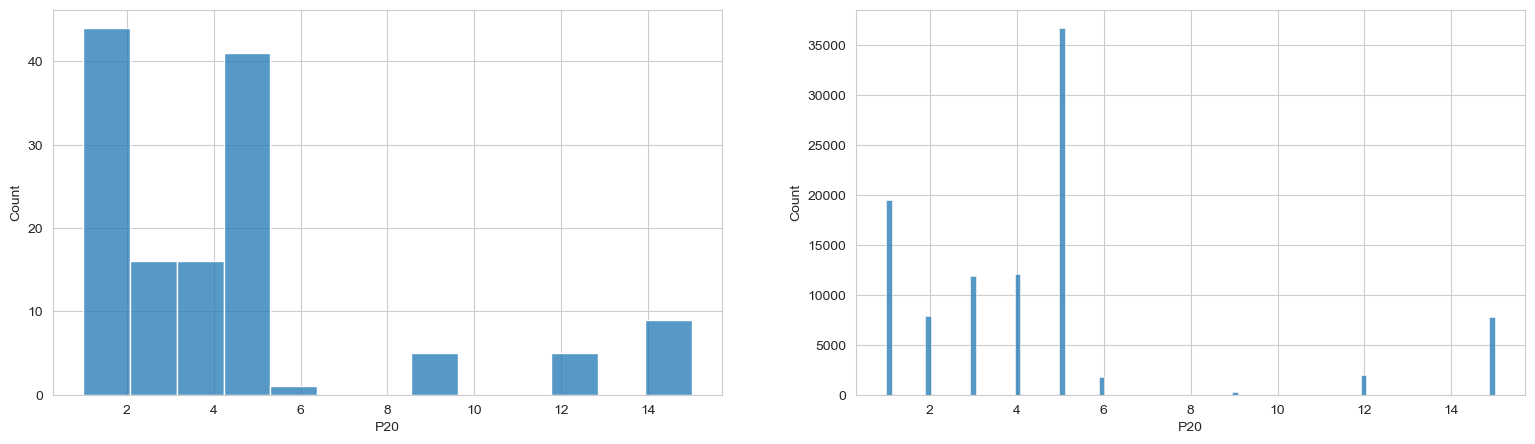

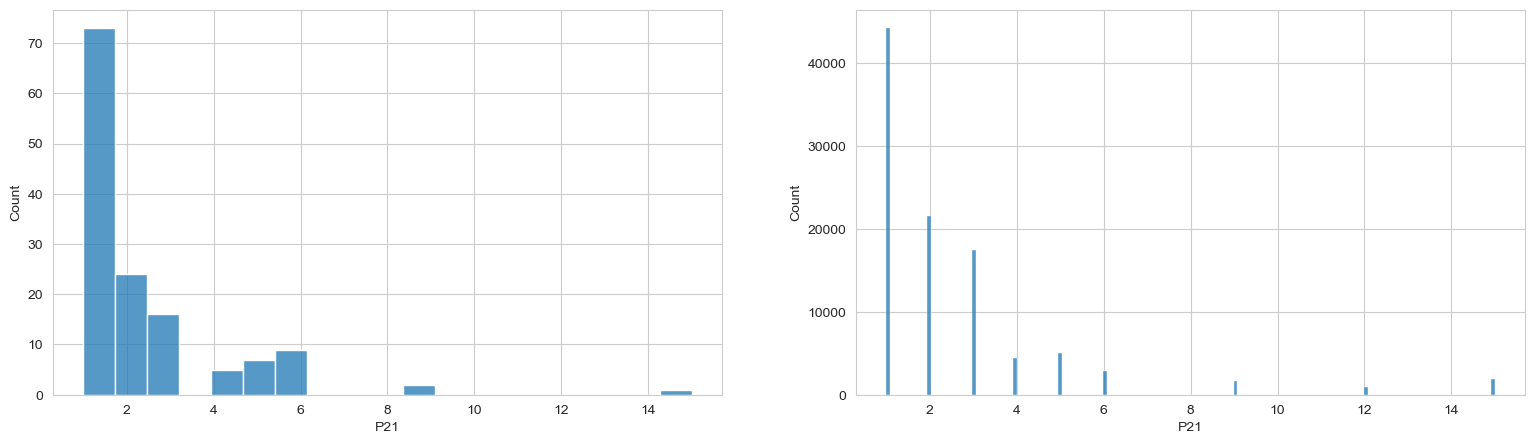

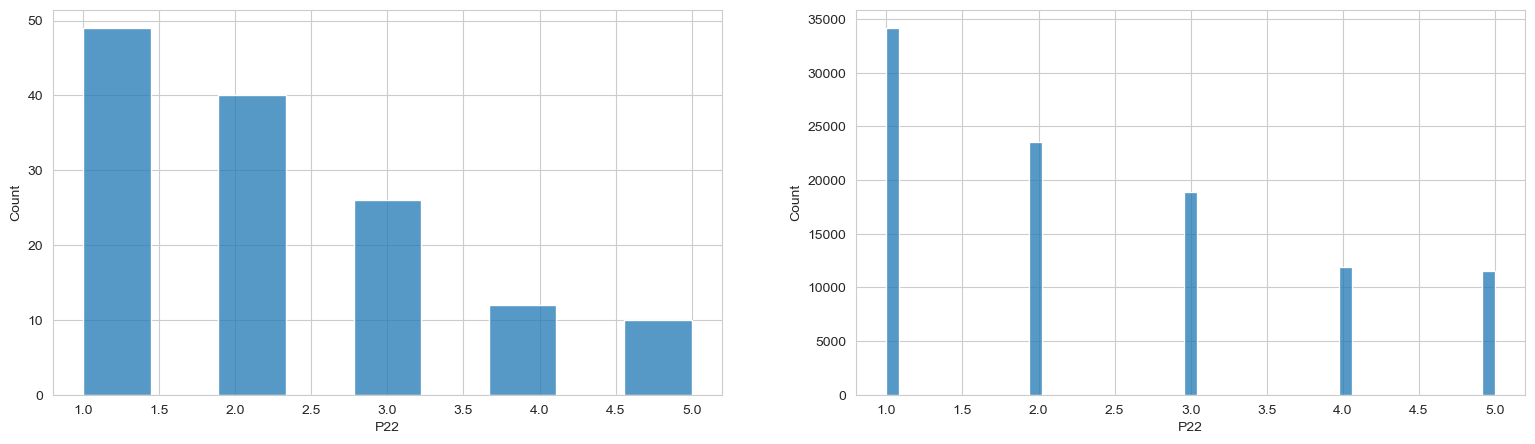

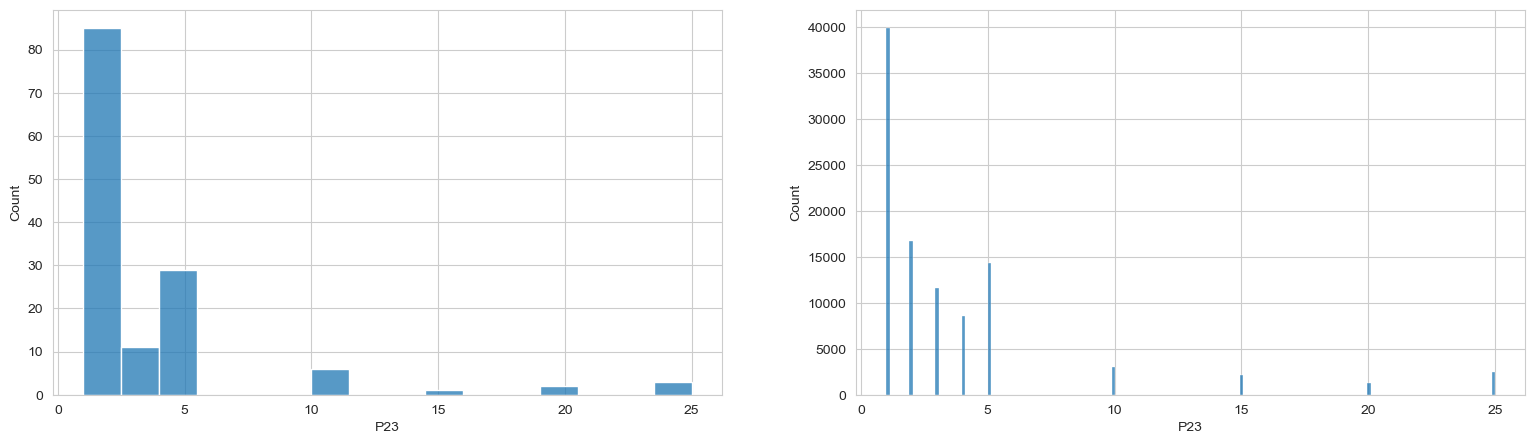

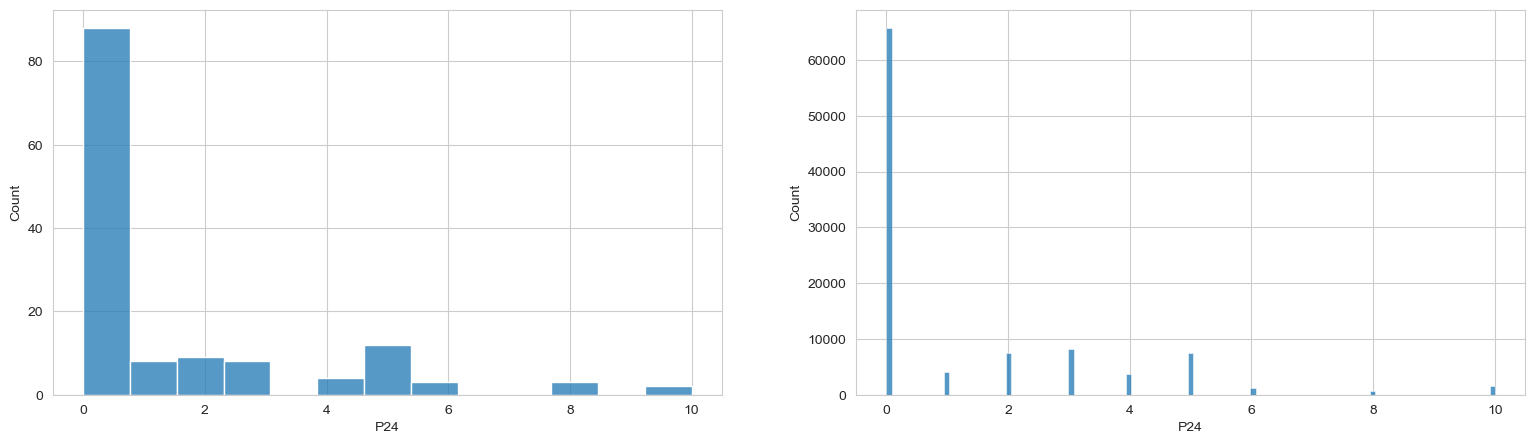

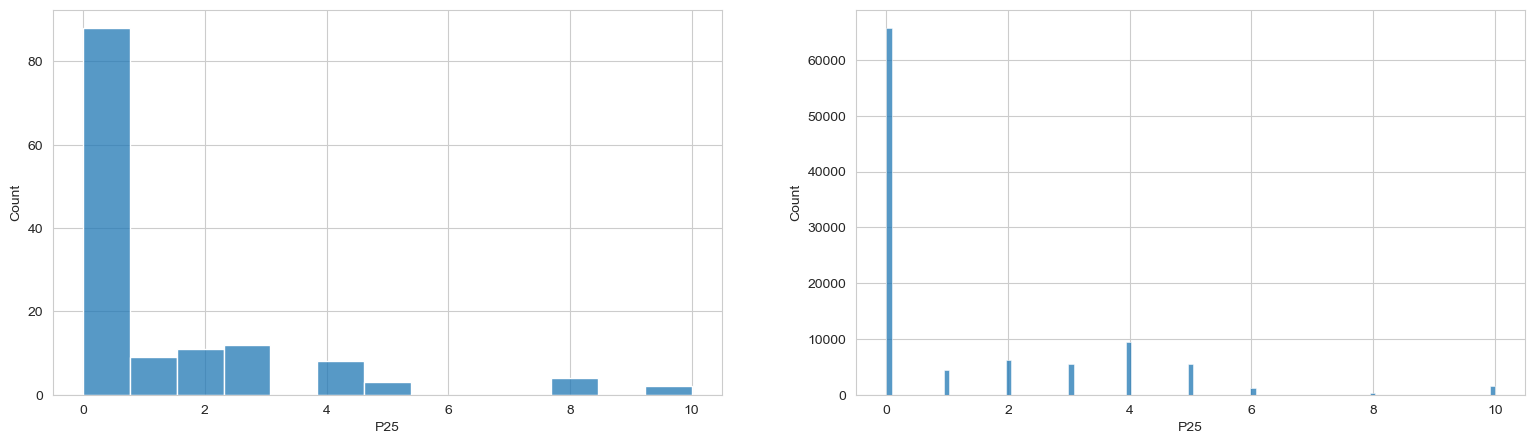

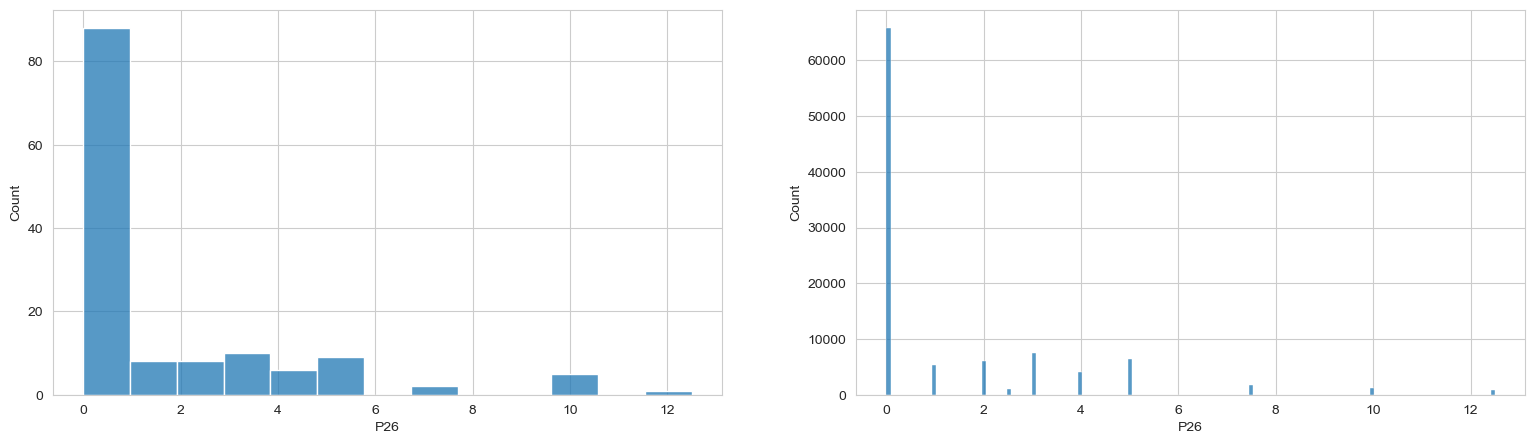

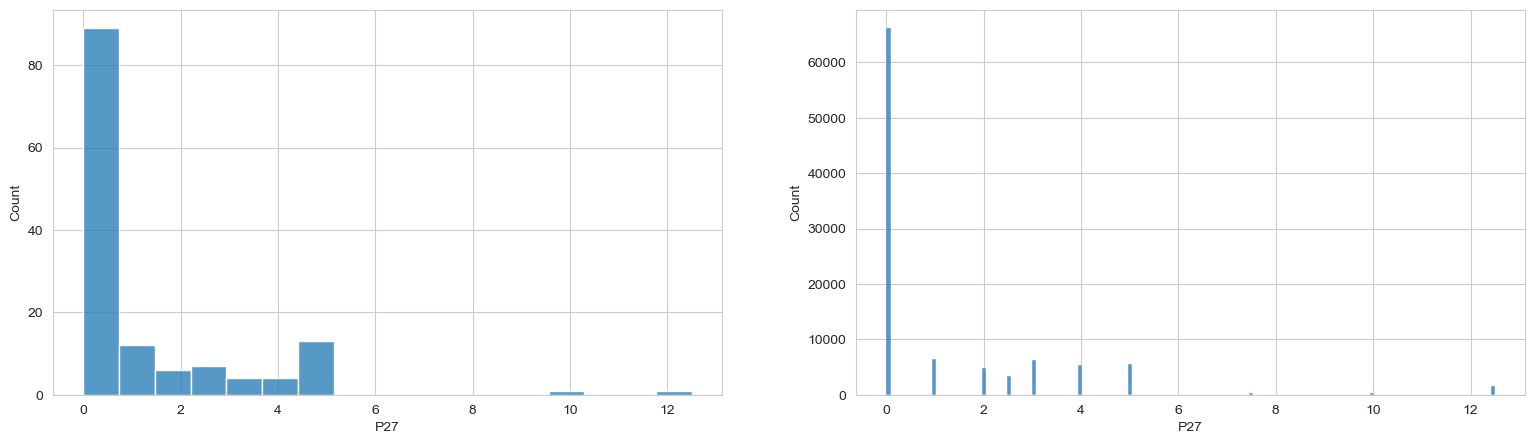

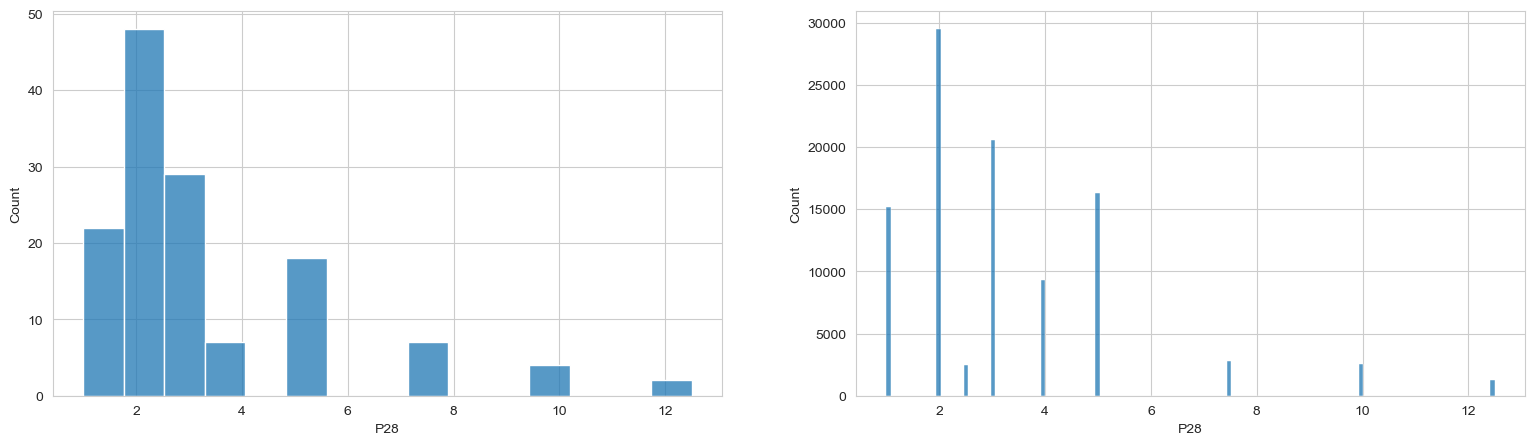

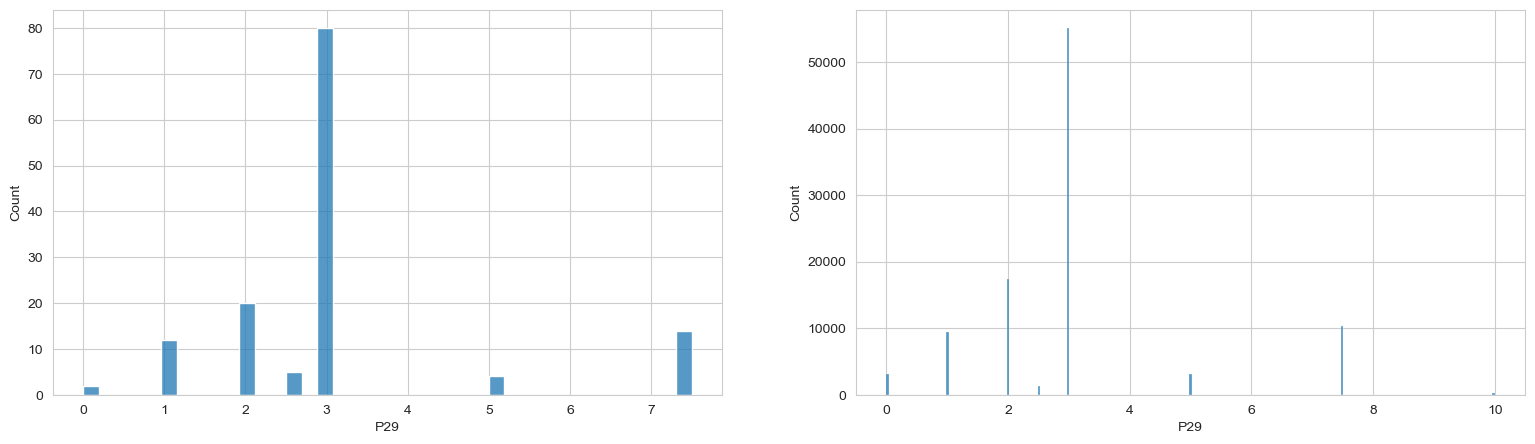

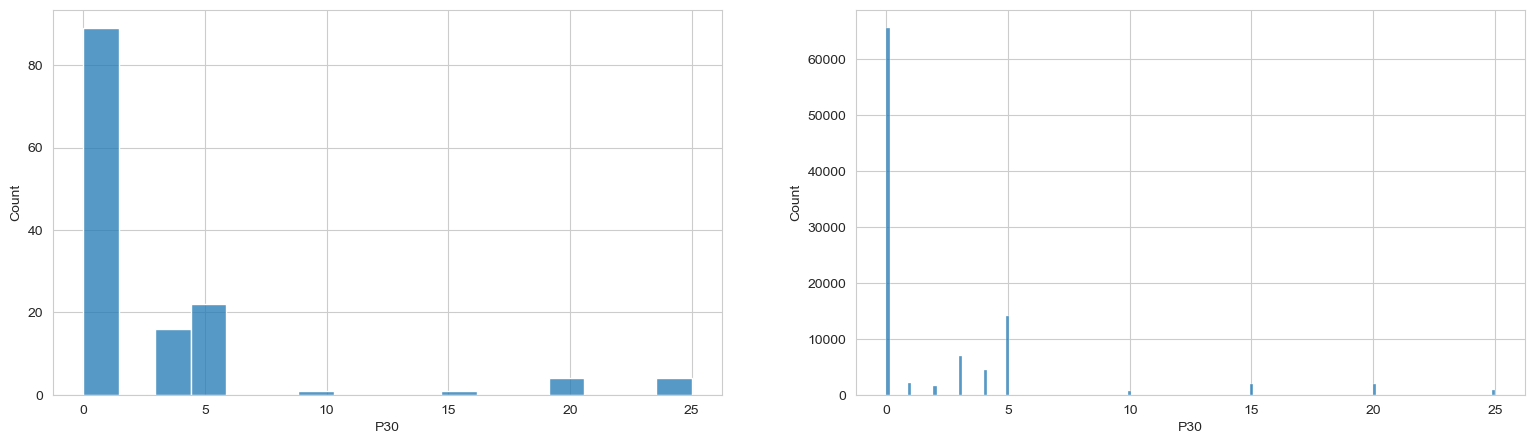

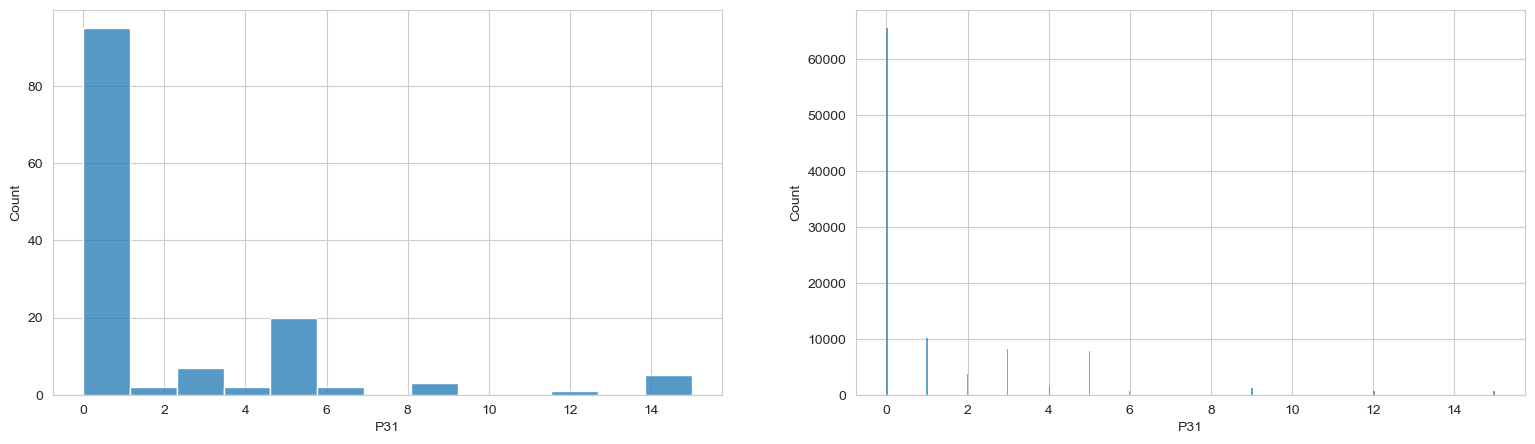

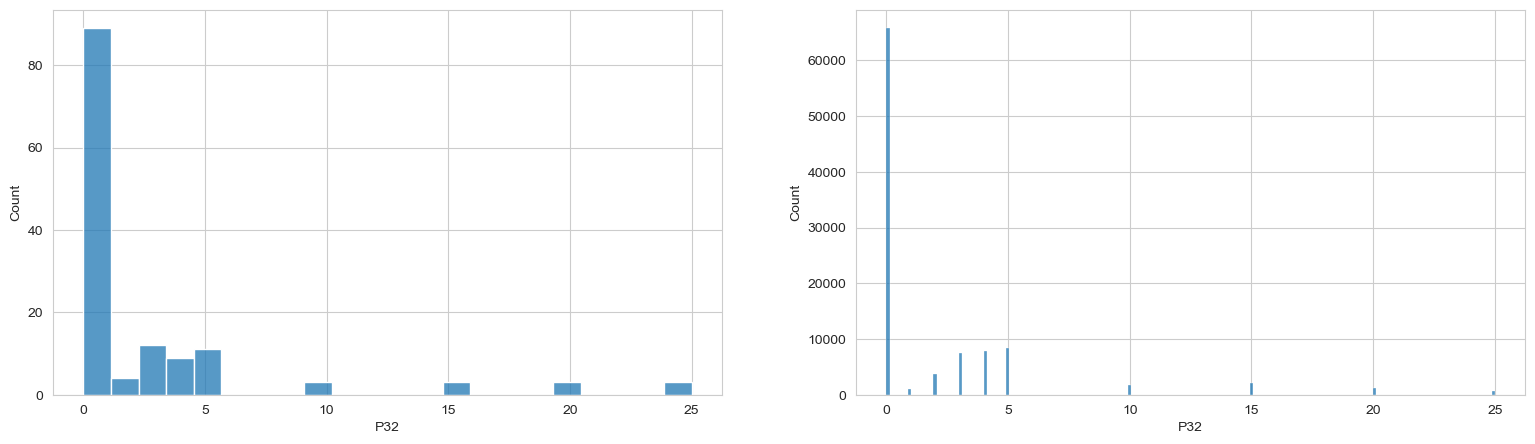

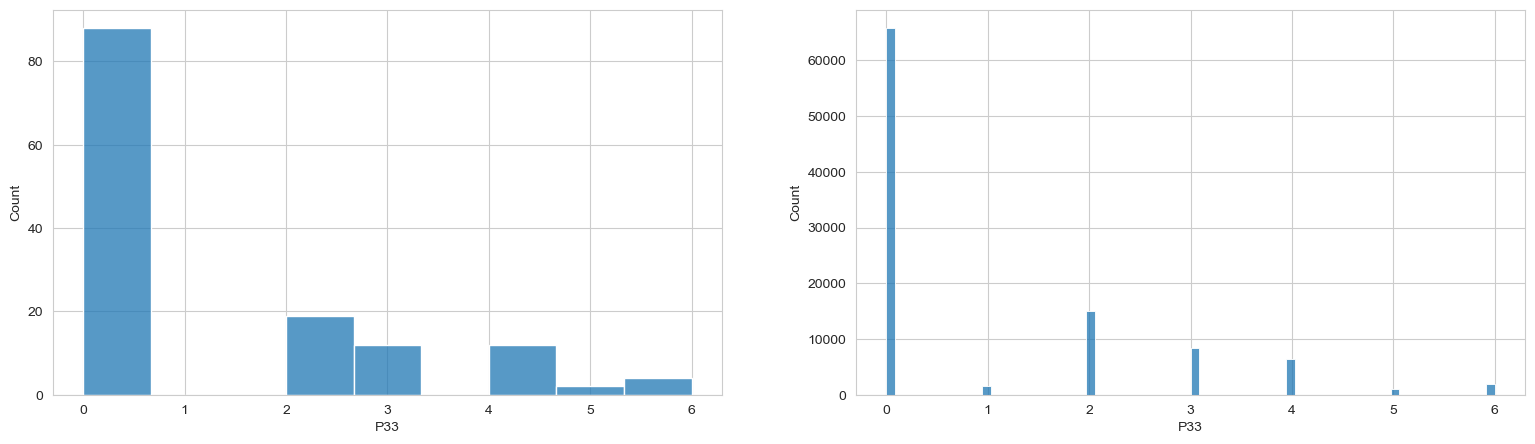

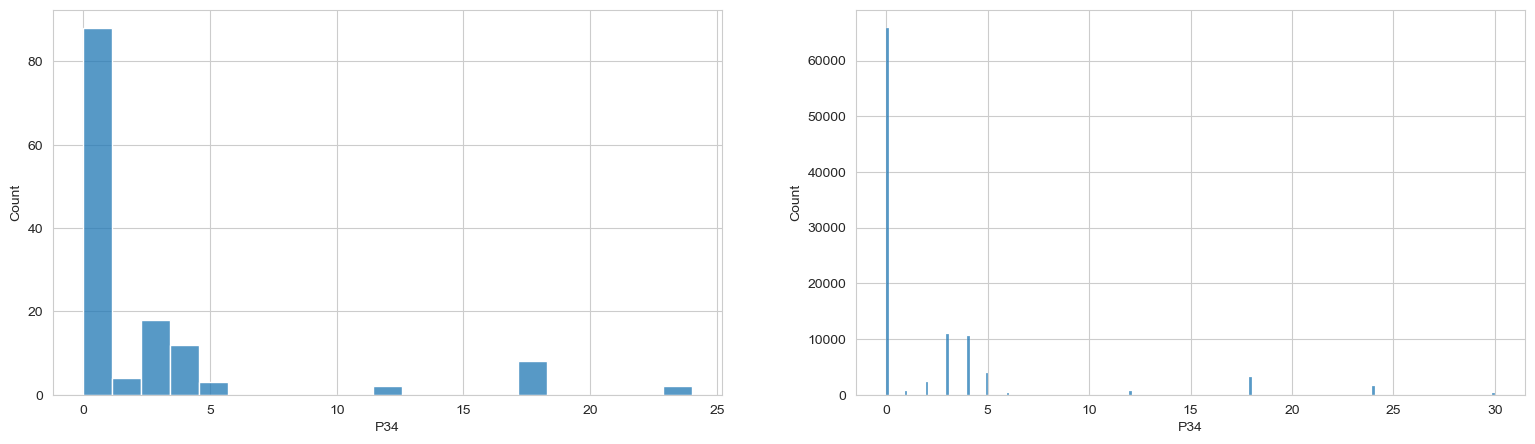

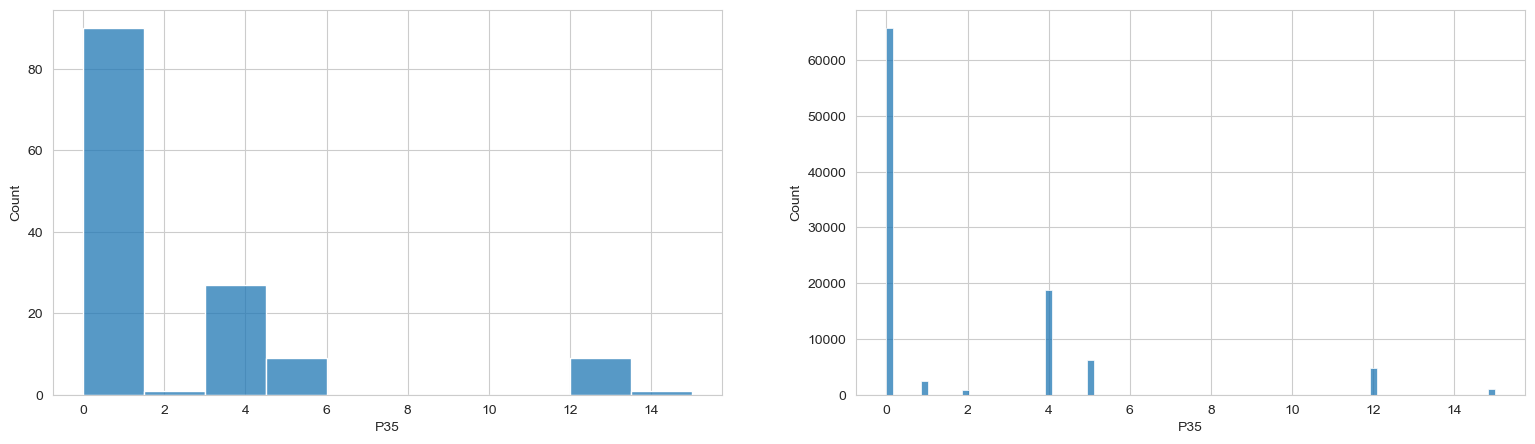

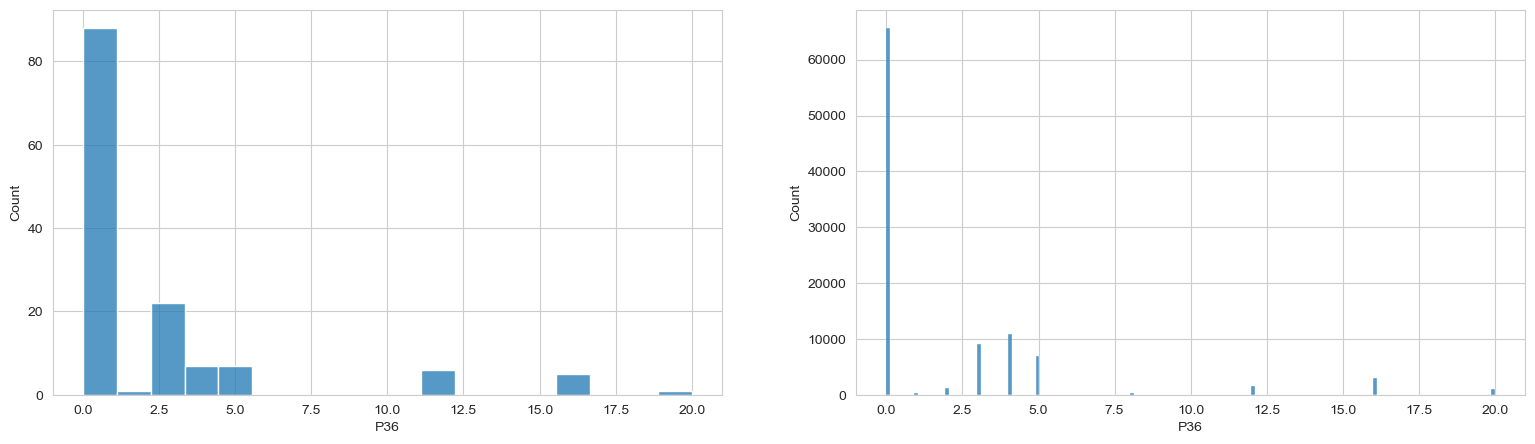

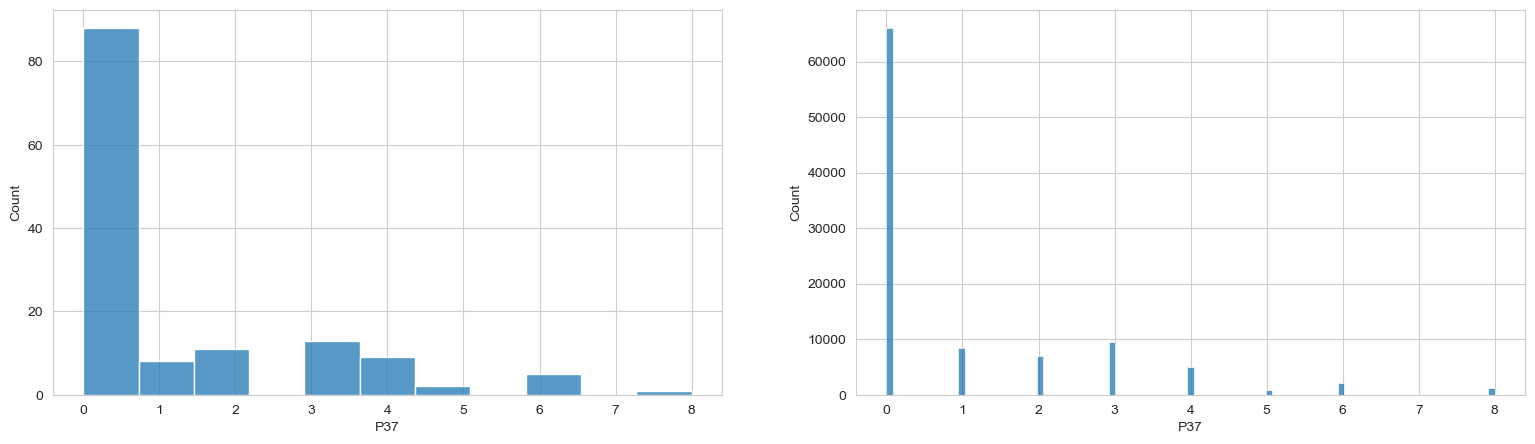

In [31]:
plt.rc('figure', max_open_warning = 0)
for i in range(1,38):
    fig, ax = plt.subplots(1,2, figsize=(19, 5))
    g1 = sns.histplot(df['P{}'.format(i)], ax=ax[0], kde=False);
    g2 = sns.histplot(test_df['P{}'.format(i)], ax=ax[1], kde=False);
    plt.show()

Можно заметить что все графики из train повторяют распределение из test

### Проверка распределения

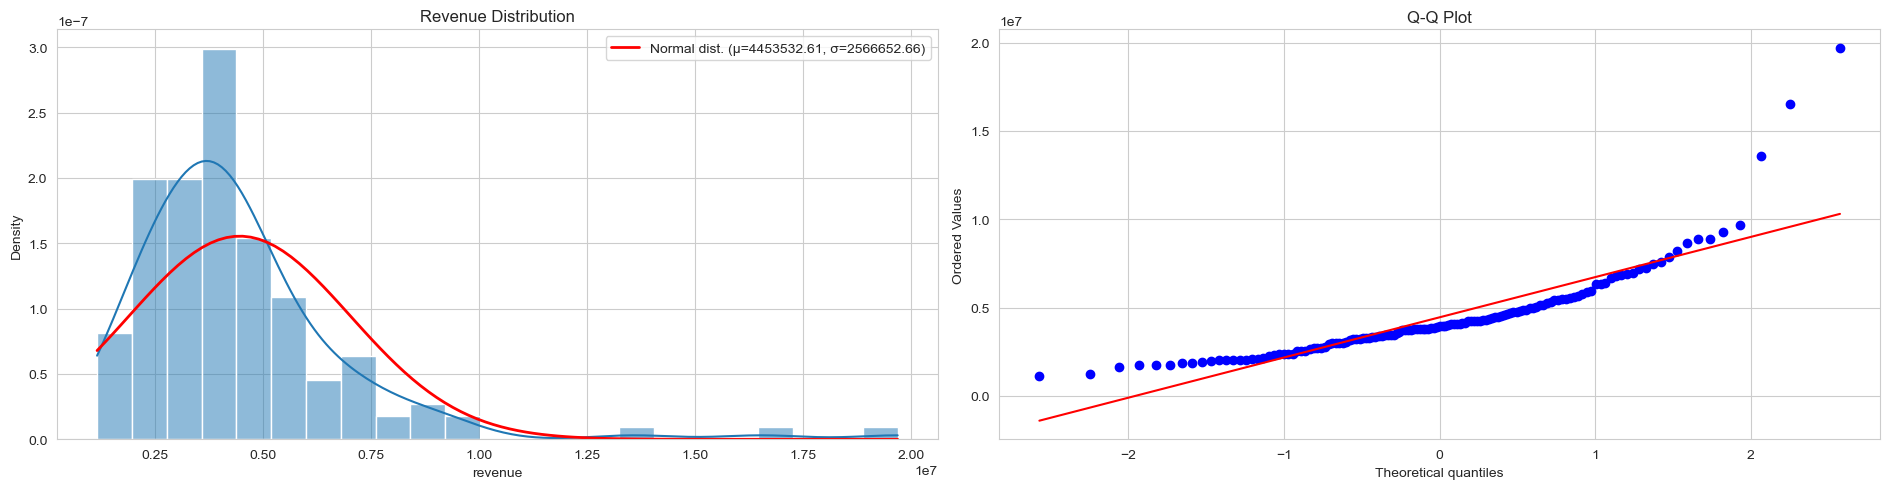

In [32]:
from scipy.stats import norm, probplot
(mu, sigma) = norm.fit(df['revenue'])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))

# Гистограмма с KDE и нормальным распределением
sns.histplot(df['revenue'], kde=True, stat='density', ax=ax1)


xmin, xmax = df['revenue'].min(), df['revenue'].max()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mu, sigma)
ax1.plot(x, y, 'r-', linewidth=2,
         label=f'Normal dist. (μ={mu:.2f}, σ={sigma:.2f})')
ax1.legend()
ax1.set_ylabel('Density')
ax1.set_title('Revenue Distribution')

# Q-Q plot для проверки нормальности
probplot(df['revenue'], plot=ax2)
ax2.set_title('Q-Q Plot')

plt.tight_layout()
plt.show()


Можно заметить что три значения сильно выделяются из графика, стоит их удалить так как это выбросы

In [33]:
df = df.drop(df[df['revenue'] >=10000000].index)
df

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Days Open
0,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,...,5,3,4,5,5,4,3,4,5653753.0,5.728
1,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,0,0,6923131.0,2.594
2,Other,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,0,0,2055379.0,0.744
3,Other,IL,6,4.5,6.0,6.0,4,4,10,8,...,25,12,10,6,18,12,12,6,2675511.0,1.145
4,Other,IL,3,4.0,3.0,4.0,2,2,5,5,...,5,1,3,2,3,4,3,3,4316715.0,2.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Other,FC,2,3.0,3.0,5.0,4,2,4,4,...,0,0,0,0,0,0,0,0,5787594.0,2.462
133,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,...,0,0,0,0,0,0,0,0,9262754.0,3.084
134,Other,FC,3,4.0,4.0,4.0,2,3,5,5,...,0,0,0,0,0,0,0,0,2544857.0,3.180
135,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,...,0,0,0,0,0,0,0,0,7217634.0,1.606


Проверим 

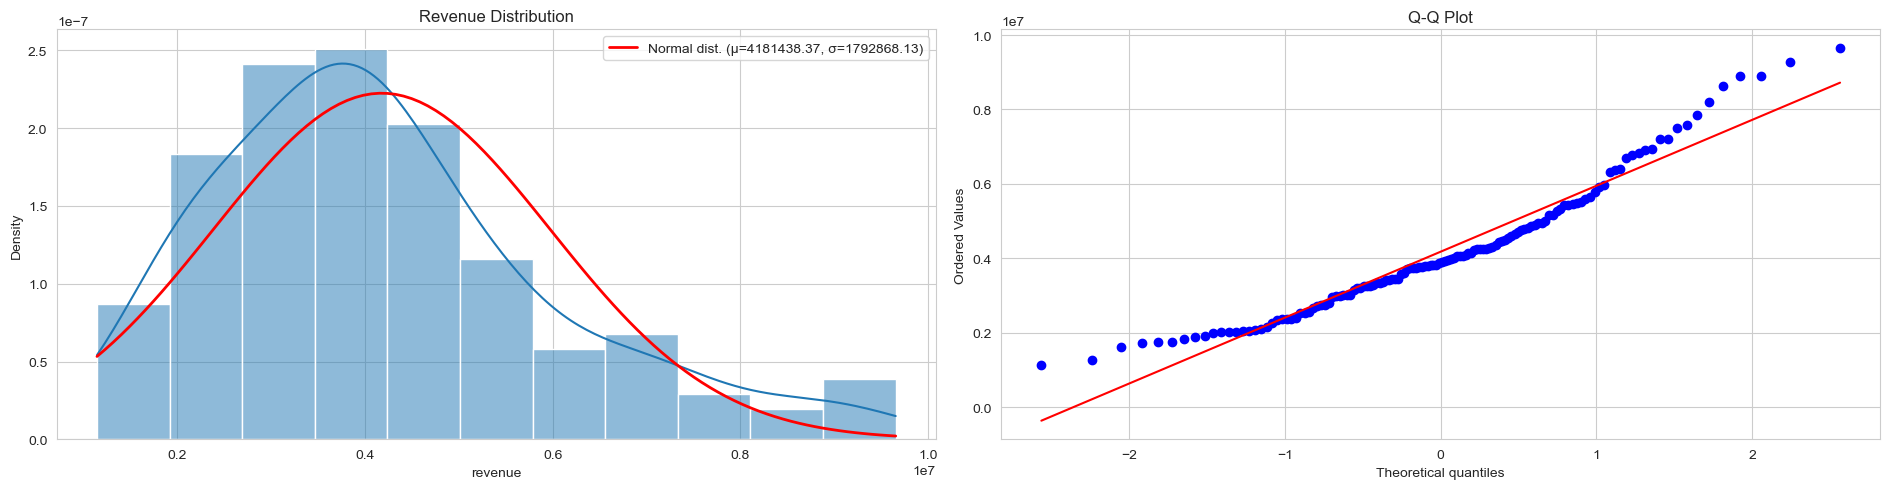

In [34]:

(mu, sigma) = norm.fit(df['revenue'])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))

# Гистограмма с KDE и нормальным распределением
sns.histplot(df['revenue'], kde=True, stat='density', ax=ax1)


xmin, xmax = df['revenue'].min(), df['revenue'].max()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mu, sigma)
ax1.plot(x, y, 'r-', linewidth=2,
         label=f'Normal dist. (μ={mu:.2f}, σ={sigma:.2f})')
ax1.legend()
ax1.set_ylabel('Density')
ax1.set_title('Revenue Distribution')

#  Q-Q plot для проверки нормальности
probplot(df['revenue'], plot=ax2)
ax2.set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

выбросов больше нет

Построим матрицу корреляции для проверки на мультиколленеарность

C:\Users\perzh\AppData\Local\Temp\ipykernel_30128\3002593918.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


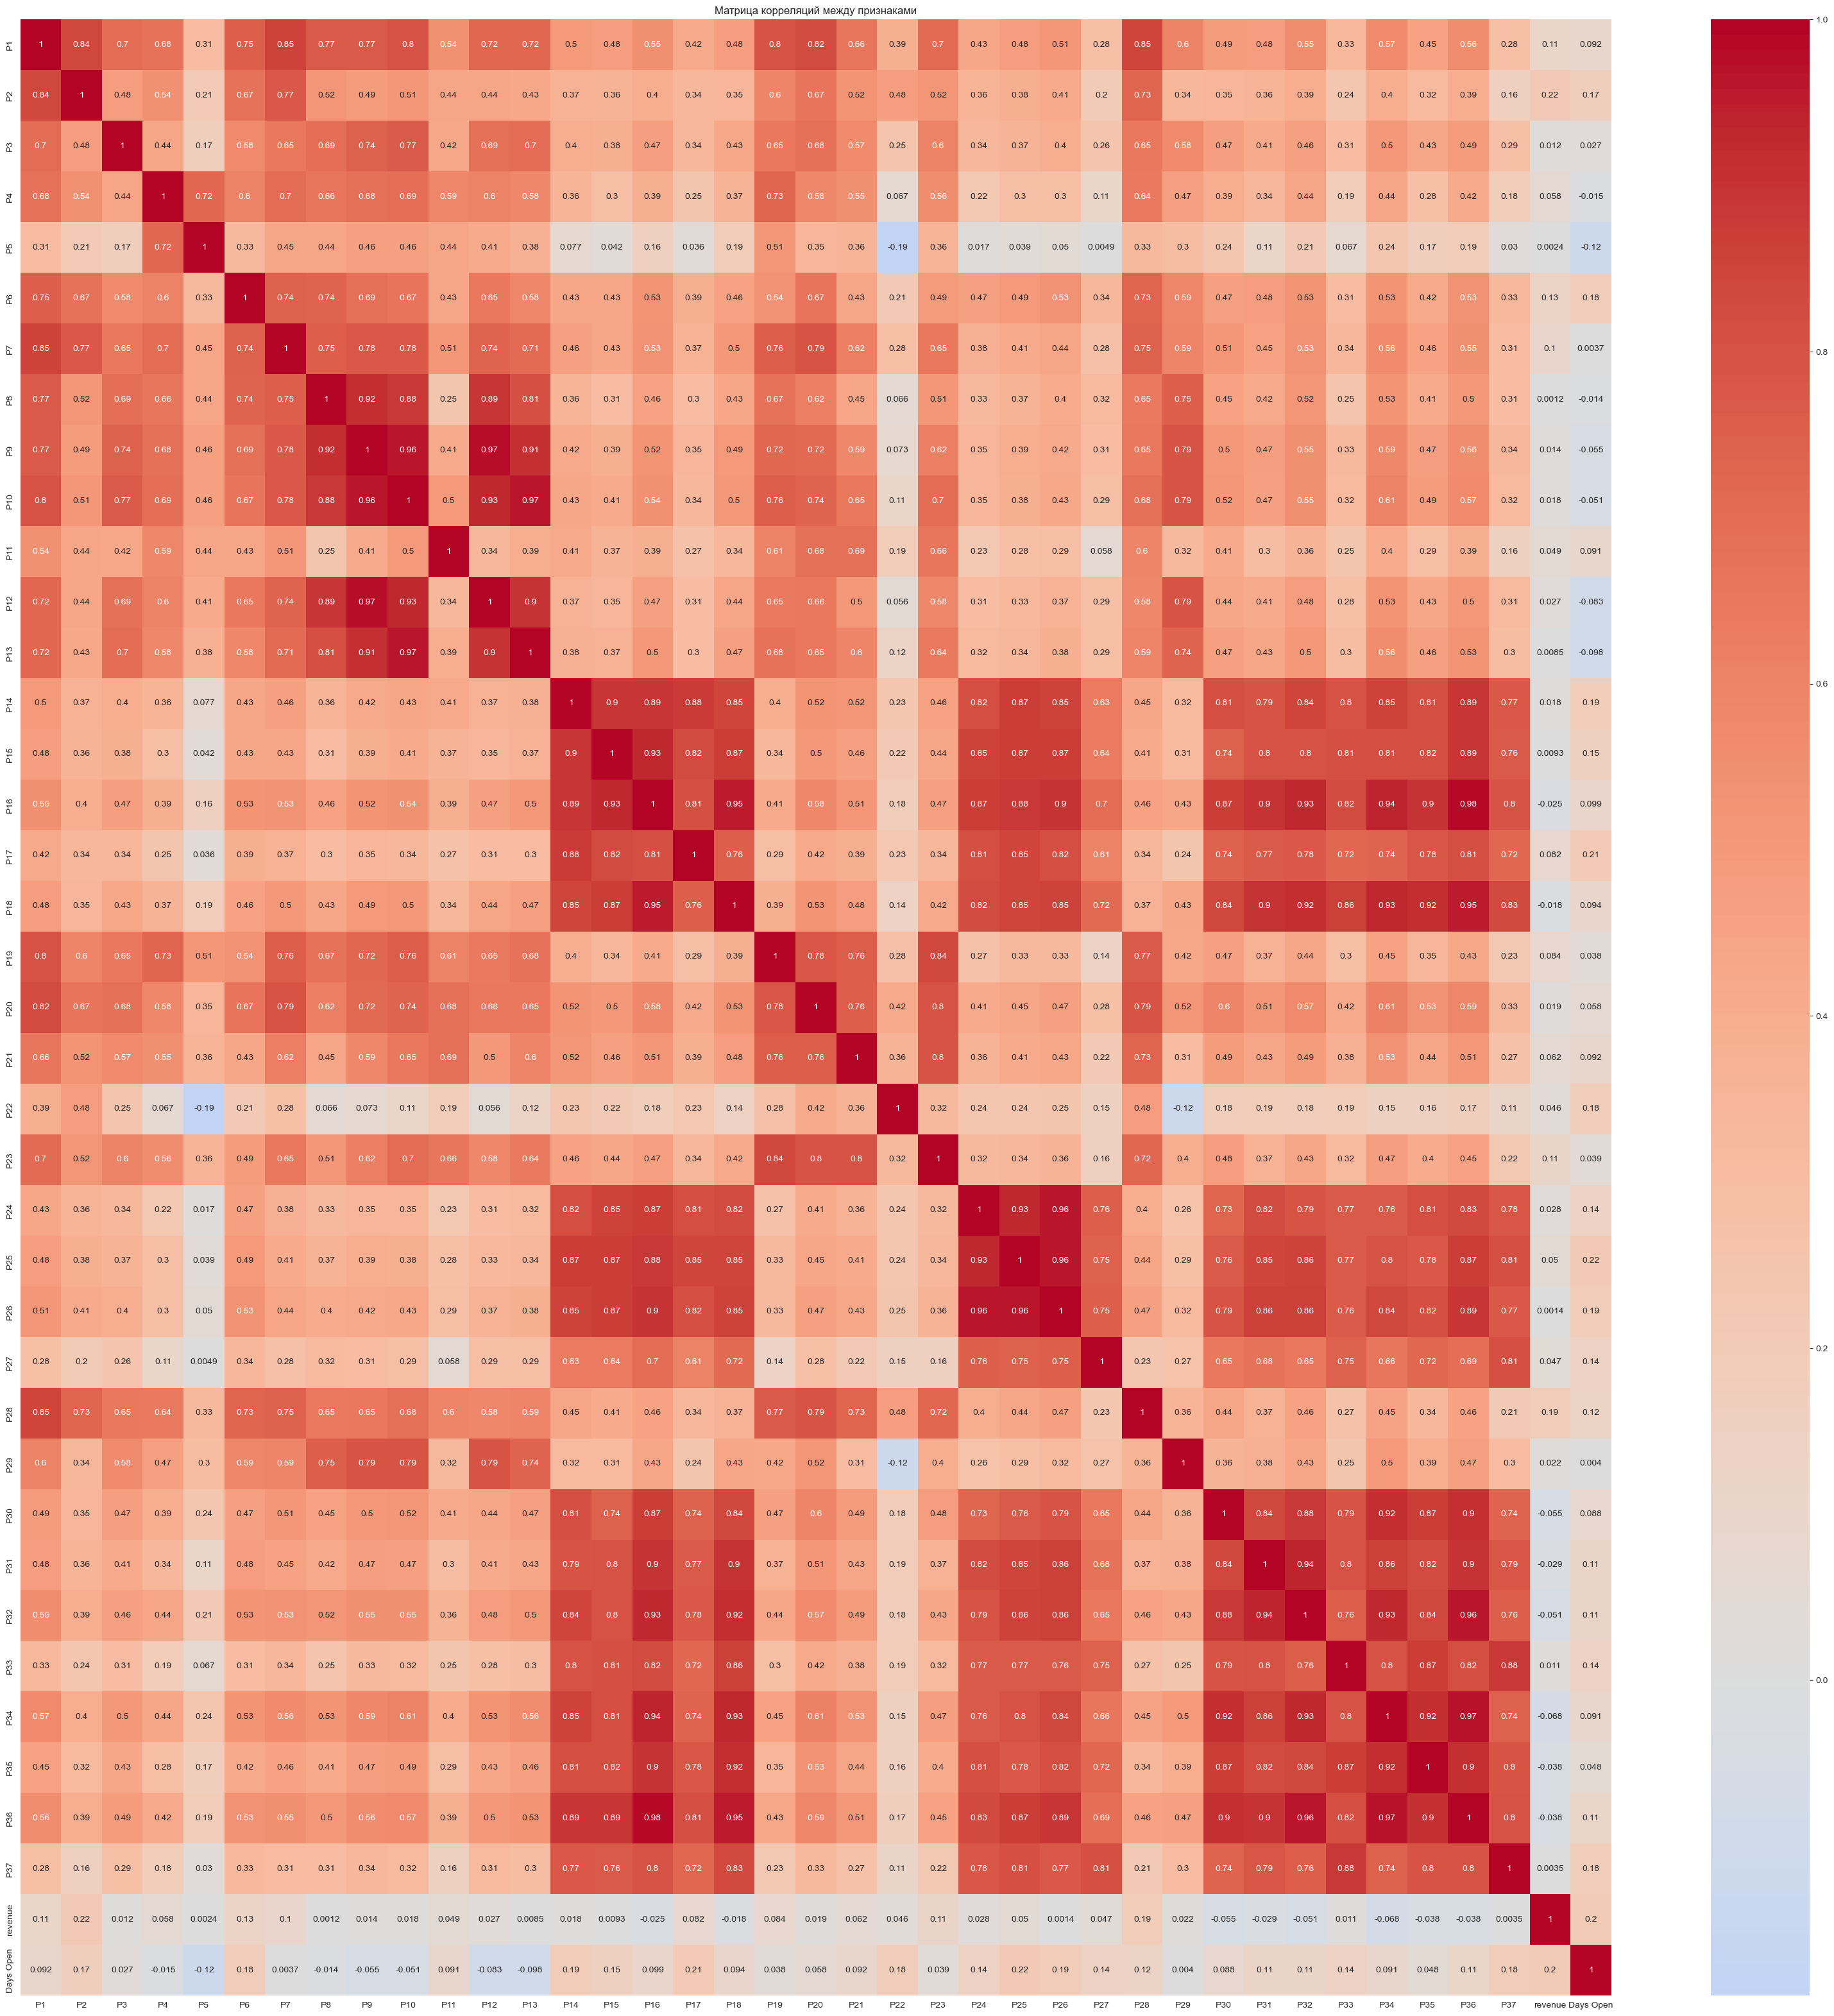

In [35]:

corr_matrix = df.corr()


plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций между признаками')
plt.show()

Можно заметить что некоторые признаки сильно коррелилуруют. Но так как будет проведен feature selection и выбранные модели устойчивы к мультиколлериарности от неё не будем избавляться.

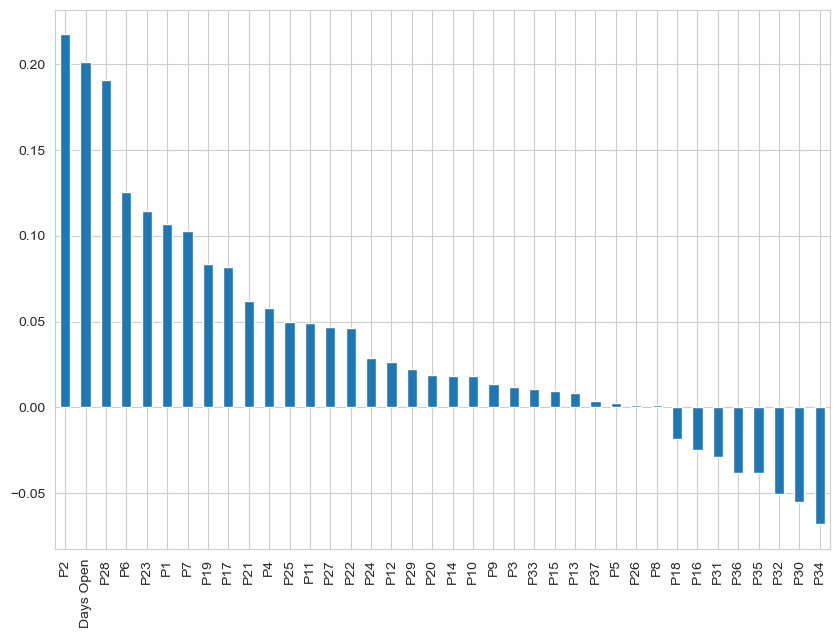

In [36]:
corr_with_revenue = df.drop(['City Group','Type'],axis=1).corr()['revenue'].sort_values(ascending=False)
plt.figure(figsize=(10,7))
corr_with_revenue.drop('revenue').plot.bar()
plt.show();

На этом графике можно заметить большая часть признаков слабо коррелирует с целевой переменной, из-за чего возможно наша модель будет плоха обучена

Сделаем оставшиеся категориальные признаки численными.

In [37]:
columnsToEncode = df.select_dtypes(include=[object]).columns
df = pd.get_dummies(df, columns=columnsToEncode, drop_first=False)
test_df = pd.get_dummies(test_df, columns=columnsToEncode, drop_first=False)
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P35,P36,P37,revenue,Days Open,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,4,5.0,4.0,4.0,2,2,5,4,5,5,...,4,3,4,5653753.0,5.728,1,0,0,0,1
1,4,5.0,4.0,4.0,1,2,5,5,5,5,...,0,0,0,6923131.0,2.594,1,0,0,1,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,...,0,0,0,2055379.0,0.744,0,1,0,0,1
3,6,4.5,6.0,6.0,4,4,10,8,10,10,...,12,12,6,2675511.0,1.145,0,1,0,0,1
4,3,4.0,3.0,4.0,2,2,5,5,5,5,...,4,3,3,4316715.0,2.144,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,3.0,3.0,5.0,4,2,4,4,4,4,...,0,0,0,5787594.0,2.462,0,1,0,1,0
133,4,5.0,4.0,4.0,2,3,5,4,4,5,...,0,0,0,9262754.0,3.084,1,0,0,1,0
134,3,4.0,4.0,4.0,2,3,5,5,5,5,...,0,0,0,2544857.0,3.180,0,1,0,1,0
135,4,5.0,4.0,5.0,2,2,5,5,5,5,...,0,0,0,7217634.0,1.606,1,0,0,1,0


# Feature Selection
Для выбора признаков будет использоваться алгоритм RFE для моделей RandomForest и XGBoost. Параметры подобраны из предыдущих тестирований без feature selection

### Подбор признаков для XGBoost

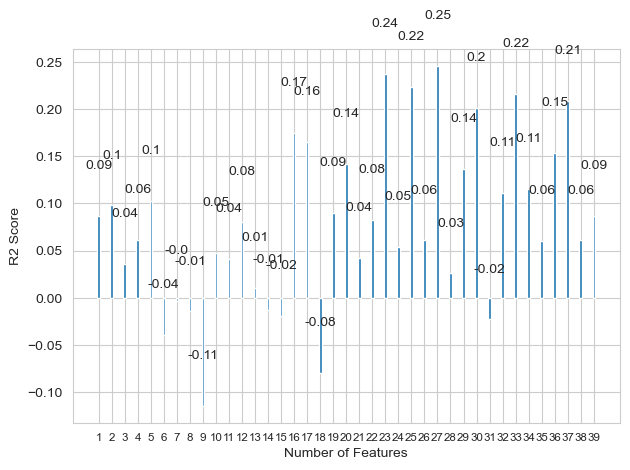

In [60]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

X, y = df.drop('revenue',axis=1), df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# rfecv_selector = RFECV(estimator=RandomForestRegressor(n_estimators=100))
# rfecv_selector.fit(X_train, y_train)
# X_train = rfecv_selector.transform(X_train)
# X_test = rfecv_selector.transform(X_test)

params_xgb = {
    'learning_rate': .1,
    'colsample_bytree': .3,
    'max_depth': 4,
    'alpha': 3,
    'subsample': .5,
    'n_estimators': 30
}

rfe_r2_score = []
for k in range(1,40):
    RFE_selector = RFE(estimator=XGBRegressor(learning_rate=params_xgb["learning_rate"],
                                              colsample_bytree=params_xgb["colsample_bytree"],
                                              max_depth=params_xgb["max_depth"],
                                              alpha=params_xgb["alpha"],
                                              subsample=params_xgb["subsample"],
                                              n_estimators=params_xgb["n_estimators"], n_jobs=-1), n_features_to_select=k)
    RFE_selector.fit(X_train, y_train)
    sel_X_train = RFE_selector.transform(X_train)
    sel_X_test = RFE_selector.transform(X_test)

    xrf_model = XGBRegressor(learning_rate=params_xgb["learning_rate"],
                            colsample_bytree=params_xgb["colsample_bytree"],
                            max_depth=params_xgb["max_depth"],
                            alpha=params_xgb["alpha"],
                            subsample=params_xgb["subsample"],
                            n_estimators=params_xgb["n_estimators"], n_jobs=-1)
    xrf_model.fit(sel_X_train, y_train)
    y_pred = xrf_model.predict(sel_X_test)
    rfe_r2_score.append(r2_score(y_test, y_pred))
fig,ax = plt.subplots()
x= np.arange(1,40)
y=rfe_r2_score
ax.bar(x,y,width=0.2)
ax.set_xlabel("Number of Features")
ax.set_ylabel("R2 Score")
ax.set_xticks(x)
ax.set_xticklabels(x,fontsize='small')
for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(round(v, 2)), ha='center')
plt.tight_layout()


### Подбор признаков для RandomForest

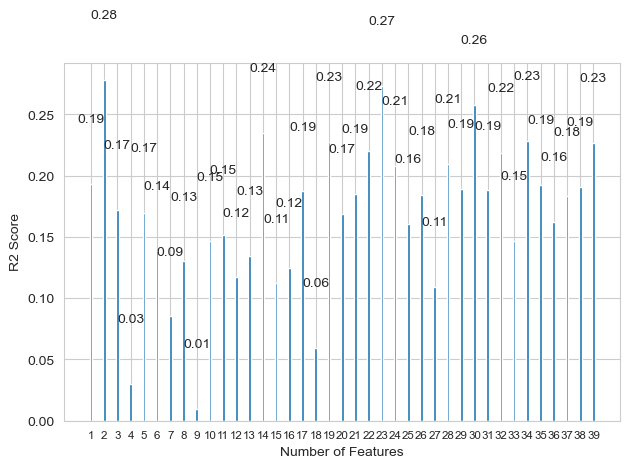

In [61]:
params_rf = {
    'max_depth': 75,
    'max_features': .4,
    'min_samples_leaf': 3,
    'min_samples_split': 8,
    'n_estimators': 30
}

rfe_r2_score = []
for k in range(1,40):
    RFE_selector = RFE(estimator=RandomForestRegressor(max_depth=params_rf["max_depth"],
                                                       max_features=params_rf["max_features"],
                                                       min_samples_leaf=params_rf["min_samples_leaf"],
                                                       min_samples_split=params_rf["min_samples_split"],
                                                       n_estimators=params_rf["n_estimators"],
                                                       n_jobs=-1, oob_score=True), n_features_to_select=k)
    RFE_selector.fit(X_train, y_train)
    sel_X_train = RFE_selector.transform(X_train)
    sel_X_test = RFE_selector.transform(X_test)

    rf_model = RandomForestRegressor(max_depth=params_rf["max_depth"],
                                                  max_features=params_rf["max_features"],
                                                  min_samples_leaf=params_rf["min_samples_leaf"],
                                                  min_samples_split=params_rf["min_samples_split"],
                                                  n_estimators=params_rf["n_estimators"],
                                                  n_jobs=-1, oob_score=True)
    rf_model.fit(sel_X_train, y_train)
    y_pred = rf_model.predict(sel_X_test)
    rfe_r2_score.append(r2_score(y_test, y_pred))
fig,ax = plt.subplots()
x= np.arange(1,40)
y=rfe_r2_score
ax.bar(x,y,width=0.2)
ax.set_xlabel("Number of Features")
ax.set_ylabel("R2 Score")
ax.set_xticks(x)
ax.set_xticklabels(x,fontsize='small')
for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(round(v, 2)), ha='center')
plt.tight_layout()

Повторно обучим с наиболее выгодным количеством признаков

In [62]:

RFE_selector = RFE(estimator=RandomForestRegressor(max_depth=params_rf["max_depth"],
                                                   max_features=params_rf["max_features"],
                                                   min_samples_leaf=params_rf["min_samples_leaf"],
                                                   min_samples_split=params_rf["min_samples_split"],
                                                   n_estimators=params_rf["n_estimators"],
                                                   n_jobs=-1, oob_score=True), n_features_to_select=2)
RFE_selector.fit(X_train, y_train)
selected_feature_mask=RFE_selector.support_
X_train_rf = X_train[X_train.columns[selected_feature_mask].tolist()]
X_test_rf = X_test[X_test.columns[selected_feature_mask].tolist()]
X_train_rf

,P28,Days Open
27,4.0,5.644
17,1.0,1.961
19,2.0,1.315
10,10.0,0.591
113,2.0,3.026
...,...,...
72,5.0,2.056
109,3.0,2.767
14,2.0,1.180
94,1.0,1.323


In [63]:
RFE_selector = RFE(estimator=XGBRegressor(learning_rate=params_xgb["learning_rate"],
                                          colsample_bytree=params_xgb["colsample_bytree"],
                                          max_depth=params_xgb["max_depth"],
                                          alpha=params_xgb["alpha"],
                                          subsample=params_xgb["subsample"],
                                          n_estimators=params_xgb["n_estimators"], n_jobs=-1), n_features_to_select=23)
RFE_selector.fit(X_train, y_train)
selected_feature_mask=RFE_selector.support_
X_train_xgb = X_train[X_train.columns[selected_feature_mask].tolist()]
X_test_xgb = X_test[X_test.columns[selected_feature_mask].tolist()]
X_train_xgb

,P1,P3,P4,P5,P6,P8,P10,P12,P14,P16,...,P21,P22,P25,P28,P29,P37,Days Open,City Group_Big Cities,City Group_Other,Type_FC
27,4,4.0,3.0,1,2,4,5,4,0,0,...,5,5,0,4.0,3.0,0,5.644,0,1,1
17,2,4.0,5.0,1,3,4,5,5,0,0,...,1,1,0,1.0,1.0,0,1.961,1,0,1
19,2,4.0,4.0,2,2,5,4,3,0,0,...,1,1,0,2.0,3.0,0,1.315,0,1,0
10,9,6.0,6.0,4,4,8,10,10,0,0,...,15,3,0,10.0,2.5,0,0.591,0,1,1
113,3,4.0,4.0,1,2,5,5,5,0,0,...,1,2,0,2.0,2.0,0,3.026,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,3,4.0,4.0,2,2,3,5,4,3,3,...,5,3,2,5.0,1.0,1,2.056,1,0,0
109,2,3.0,5.0,4,5,4,4,4,0,0,...,1,1,0,3.0,2.0,0,2.767,1,0,1
14,2,4.0,4.0,1,2,5,5,5,0,0,...,1,3,0,2.0,3.0,0,1.180,0,1,1
94,2,4.0,4.0,2,2,5,5,5,3,4,...,1,2,1,1.0,3.0,5,1.323,0,1,1


# Обучение и проверка моделей
Сравнивыми моделями будут RandomForest, XGBoost и LightGBM. Признаки были подобраны для RandomForest и XGBoost, для LightGBM будут использоваться такие же признаки как для XGBoost. Подбор гиперпараметров будет сделан при помощи GridSearchCV, так как этот алгоритм имеет из-за встроенной кросс-валидации, так как тренировочный датасет очень мал. Также этот алгоритм довльно прост по сравнению с другими.  

### RandomForest

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

params_rf = {
    'max_depth': [10, 30, 35, 50, 65, 75, 100],
    'max_features': [.3, .4, .5, .6],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30, 50, 100, 200]
}

rf = RandomForestRegressor()
rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
rf_regressor.fit(X_train_rf, y_train)
print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
print(f'Best score: {rf_regressor.best_score_}')

Optimal depth: 100
Optimal max_features: 0.3
Optimal min_sample_leaf: 4
Optimal min_samples_split: 12
Optimal n_estimators: 30
Best score: -1708491.1922263347


Train r2 score:  -2.979607897115014
Test r2 score:  0.2976969516039719
Train RMSE: 1476804.8835
Test RMSE: 1531732.8384

K-Fold Validation Results:
Средний R²: 0.04759647302050622
Средний RMSE: 1699581.784127789


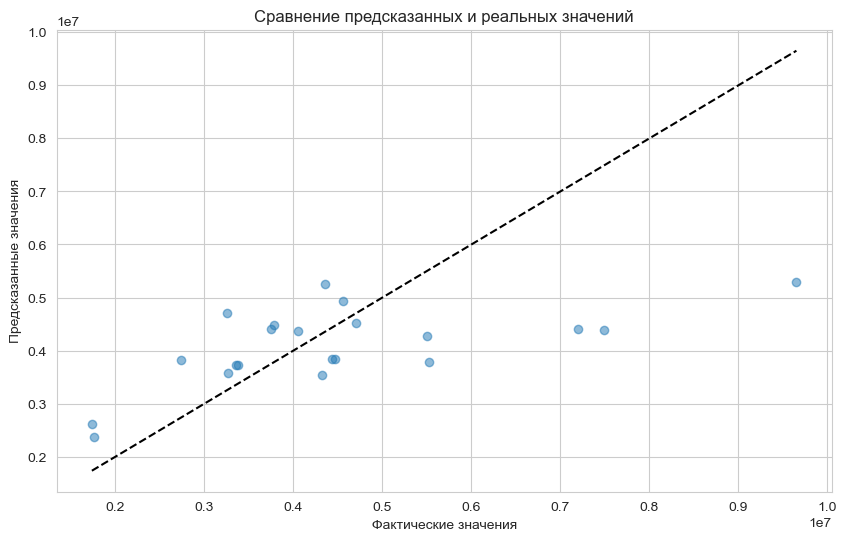

In [57]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import r2_score, mean_squared_error

rf_model = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"],
                                 max_features=rf_regressor.best_params_["max_features"],
                                 min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"],
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"],
                                 n_estimators=rf_regressor.best_params_["n_estimators"],
                                 n_jobs=-1, oob_score=True)
rf_model.fit(X_train_rf, y_train)
y_train_pred = rf_model.predict(X_train_rf)
y_pred = rf_model.predict(X_test_rf)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

cv_results = cross_validate(
    rf_model,
    X_train,
    y_train,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring={
        'r2': 'r2',
        'rmse': 'neg_root_mean_squared_error'
    }
)

print("\nK-Fold Validation Results:")
print("Средний R²:", cv_results['test_r2'].mean())
print("Средний RMSE:", -cv_results['test_rmse'].mean())

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение предсказанных и реальных значений')
plt.show()

### XGBoost

In [64]:
from xgboost import XGBRegressor

params_xgb = {
    'learning_rate': [.1, .5, .7, .9, .95, .99, 1],
    'colsample_bytree': [.3, .4, .5, .6],
    'max_depth': [4,8,12,16],
    'alpha': [3],
    'subsample': [.5],
    'n_estimators': [30, 70, 100, 200]
}

xgb_model = XGBRegressor()
xgb_regressor = GridSearchCV(xgb_model, params_xgb, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
xgb_regressor.fit(X_train_xgb, y_train)
print(f'Optimal lr: {xgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal colsample_bytree: {xgb_regressor.best_params_["colsample_bytree"]}')
print(f'Optimal n_estimators: {xgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {xgb_regressor.best_score_}')
print(f'Best score: {xgb_regressor.best_params_["max_depth"]}')

Optimal lr: 0.1
Optimal colsample_bytree: 0.3
Optimal n_estimators: 30
Best score: -1591269.3450556465
Best score: 4


Train r2 score:  -0.12043021177952107
Test r2 score:  0.237505497393533
Train RMSE: 1003184.8424
Test RMSE: 1596022.8503

K-Fold Validation Results:
Средний R²: 0.0015724876639563235
Средний RMSE: 1735808.3771074736


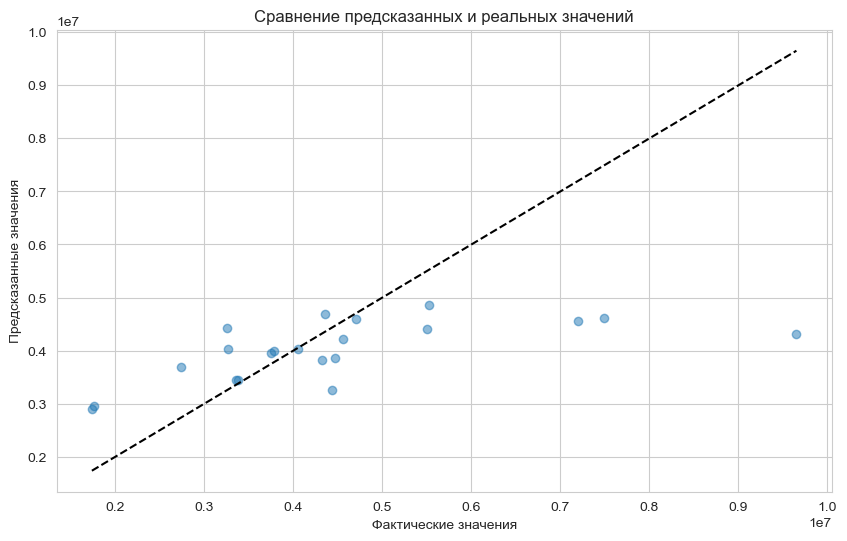

In [65]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import r2_score, mean_squared_error

xgb_model = XGBRegressor(learning_rate=xgb_regressor.best_params_["learning_rate"],
                         colsample_bytree=xgb_regressor.best_params_["colsample_bytree"],
                         max_depth=xgb_regressor.best_params_["max_depth"],
                         alpha=xgb_regressor.best_params_["alpha"],
                         subsample=xgb_regressor.best_params_["subsample"],
                         n_estimators=xgb_regressor.best_params_["n_estimators"], n_jobs=-1)
xgb_model.fit(X_train_xgb, y_train)
y_train_pred = xgb_model.predict(X_train_xgb)
y_pred = xgb_model.predict(X_test_xgb)
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

cv_results = cross_validate(
    xgb_model,
    X_train,
    y_train,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring={
        'r2': 'r2',
        'rmse': 'neg_root_mean_squared_error'
    }
)

print("\nK-Fold Validation Results:")
print("Средний R²:", cv_results['test_r2'].mean())
print("Средний RMSE:", -cv_results['test_rmse'].mean())

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение предсказанных и реальных значений')
plt.show()

### LightGBM

In [66]:
import lightgbm as lgbm

params_lgbm = {
    'learning_rate': [.01, .1, .5, .7, .9, .95, .99, 1],
    'boosting': ['gbdt'],
    'metric': ['l1'],
    'feature_fraction': [.3, .4, .5, 1],
    'num_leaves': [20],
    'min_data': [10],
    'max_depth': [5,10,20,30],
    'n_estimators': [10, 30, 50, 100]
}

lgb = lgbm.LGBMRegressor()
lgb_regressor = GridSearchCV(lgb, params_lgbm, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
lgb_regressor.fit(X_train_xgb, y_train)
print(f'Optimal lr: {lgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal feature_fraction: {lgb_regressor.best_params_["feature_fraction"]}')
print(f'Optimal n_estimators: {lgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {lgb_regressor.best_score_}')

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if mem

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=10. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if mem

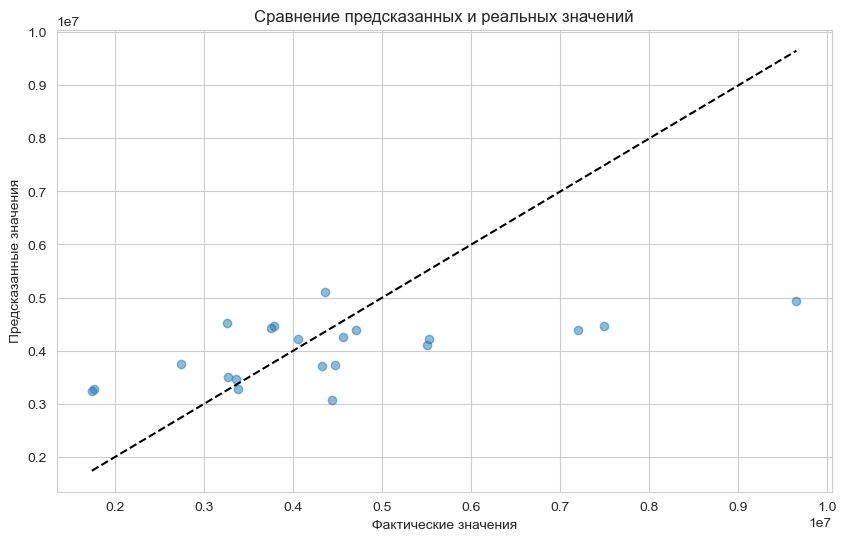

In [68]:
lgb_model = lgbm.LGBMRegressor(learning_rate=lgb_regressor.best_params_["learning_rate"], boosting='gbdt',
                               metric='l1', feature_fraction=lgb_regressor.best_params_["feature_fraction"],
                               num_leaves=20, min_data=10, max_depth=10,
                               n_estimators=lgb_regressor.best_params_["n_estimators"], n_jobs=-1)
lgb_model.fit(X_train_xgb, y_train)
y_train_pred = lgb_model.predict(X_train_xgb)
y_pred = lgb_model.predict(X_test_xgb)

cv_results = cross_validate(
    lgb_model,
    X_train,
    y_train,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring={
        'r2': 'r2',
        'rmse': 'neg_root_mean_squared_error'
    }
)

print("\nK-Fold Validation Results:")
print("Средний R²:", cv_results['test_r2'].mean())
print("Средний RMSE:", -cv_results['test_rmse'].mean())
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение предсказанных и реальных значений')
plt.show()

По результатам обучения наиболее лучшими моделями оказались RandomForestRegressor и XGBoostRegressor. Так как результаты более менее схожи у этих двух моделей, то для приложения будет выбрана модель RandomForestRegressor, так как требует меньше входных параметров.

# Save model

In [76]:
import pickle
with open('D:\BSUIR\sem6\practice\model\model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)